- Compare Slow Lanczos (PyHessian, Papyan, Demmel) and Fast Lanczos (Papyan, Demmel)
- Reproduce the experiments from Example 7.1 in the book "Applied Numerical Linear Algebra" by J. Demmel. Link: http://www.stat.uchicago.edu/~lekheng/courses/302/demmel/demmch7.pdf

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os

if os.getcwd().split("/")[-1] != "lanczos":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/nadezhda/Desktop/spectral-properties-of-NN/lanczos


In [3]:
import torch
import matplotlib.pyplot as plt
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, plot_lanczos_iterations

In [4]:
mtx_size = 100
num_iterations = 20 # number of steps of the Lanczos algorithm to visualize
seed = 10 # set seed to have the same starting vector v1 (for the Lanczos algorithm) in all expetiments

#### Generate eigenvalues

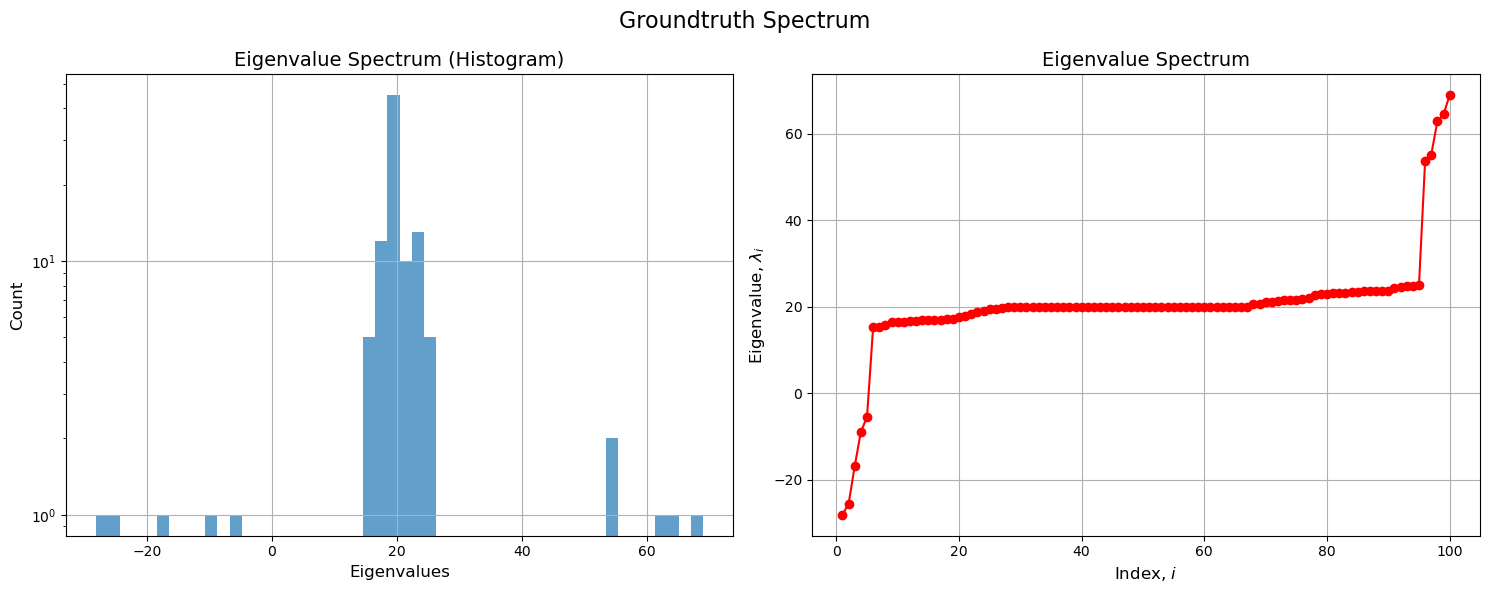

In [5]:
torch.manual_seed(1)
num_bins = 50 # number of bins for the histograms
dict_eigenvalues = {
	'num_around_zero': 50,
	'around_zero_low': -5,
	'around_zero_high': 5,
	'num_pos_extremes': 5,
	'pos_low': 25,
	'pos_high': 50,
	'num_neg_extremes': 5,
	'neg_low': -50,
	'neg_high': -25
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
# translate eigenvalues to the right
translate_by = 20
eigenvalues = eigenvalues + translate_by
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [6]:
mtx = matrix(eigenvalues)

#### Sanity check

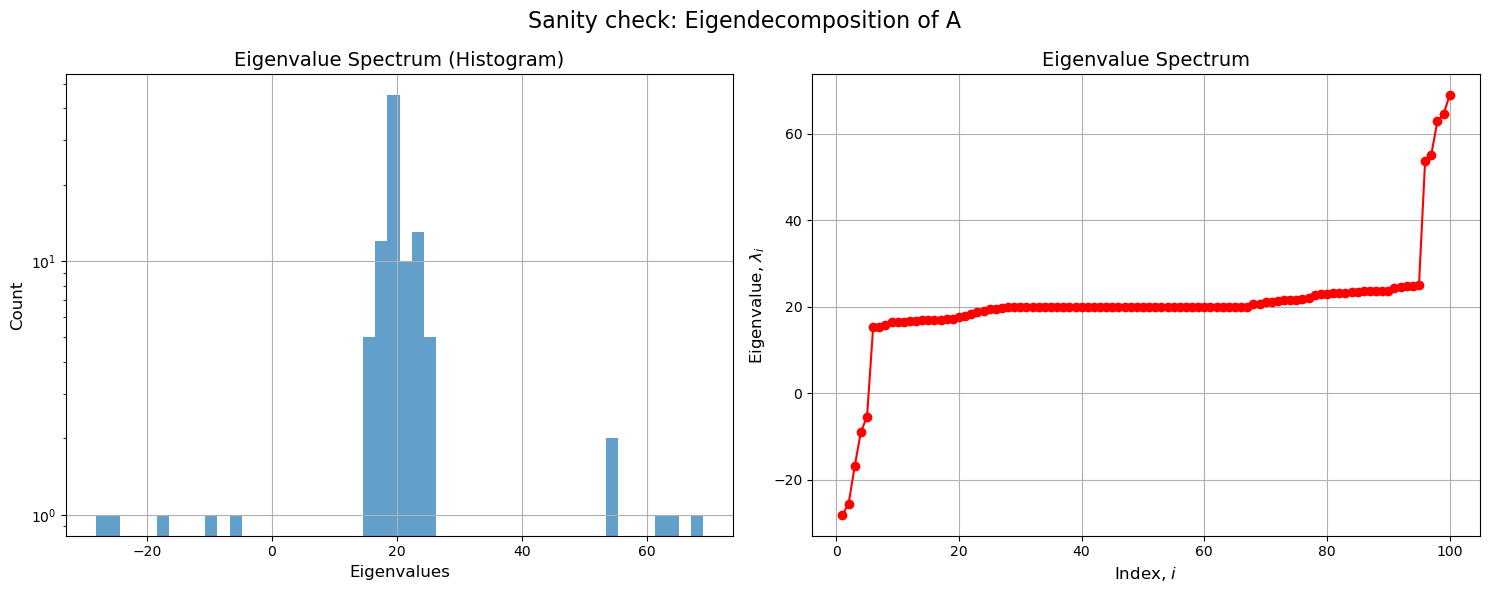

L2 distance: 0.00035556836519390345


In [7]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, eigenvalues_A, 2)}")

#### Slow Lanczos algorithm (PyHessian version)

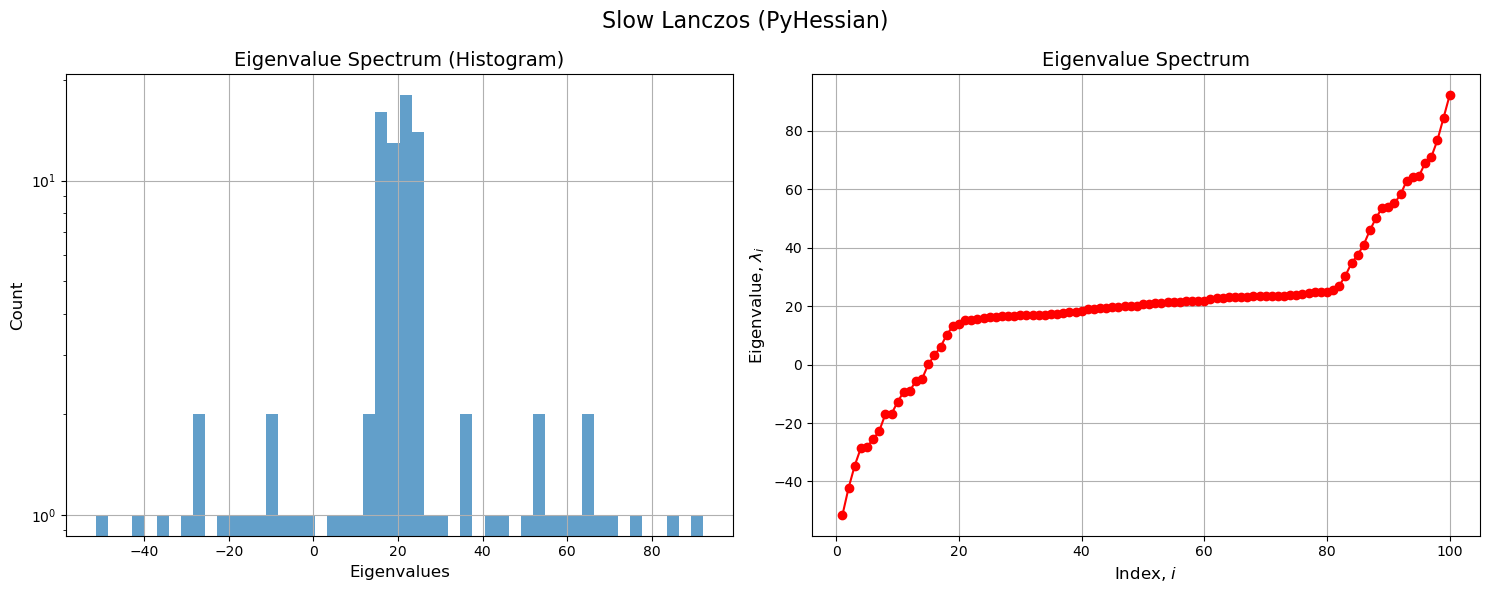

L2 distance: 153.06529235839844


In [8]:
eigenvalues_slow_lanczos_pyhessian, _, alpha_slow_pyhessian, beta_slow_pyhessian = mtx.slow_lanczos_pyhessian(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_pyhessian, num_bins=num_bins, title='Slow Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2)}")

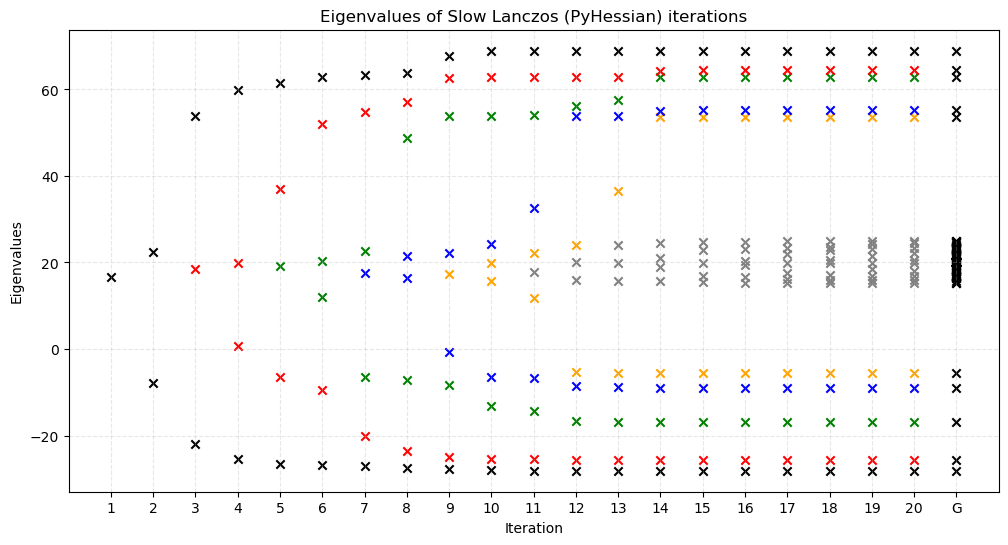

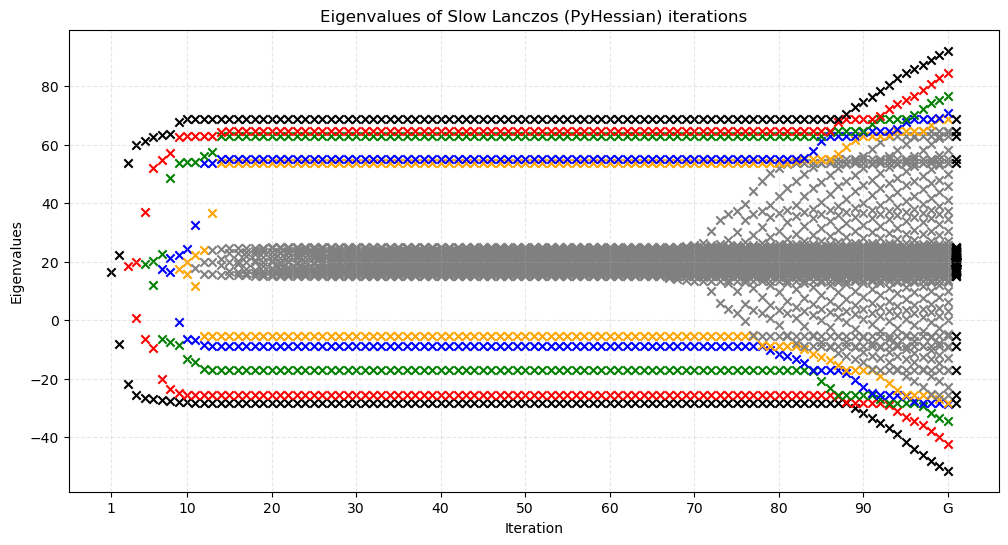

In [9]:
eigenvalues_slow_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")
eigenvalues_slow_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")

#### Slow Lanczos algorithm (Papyan's version)

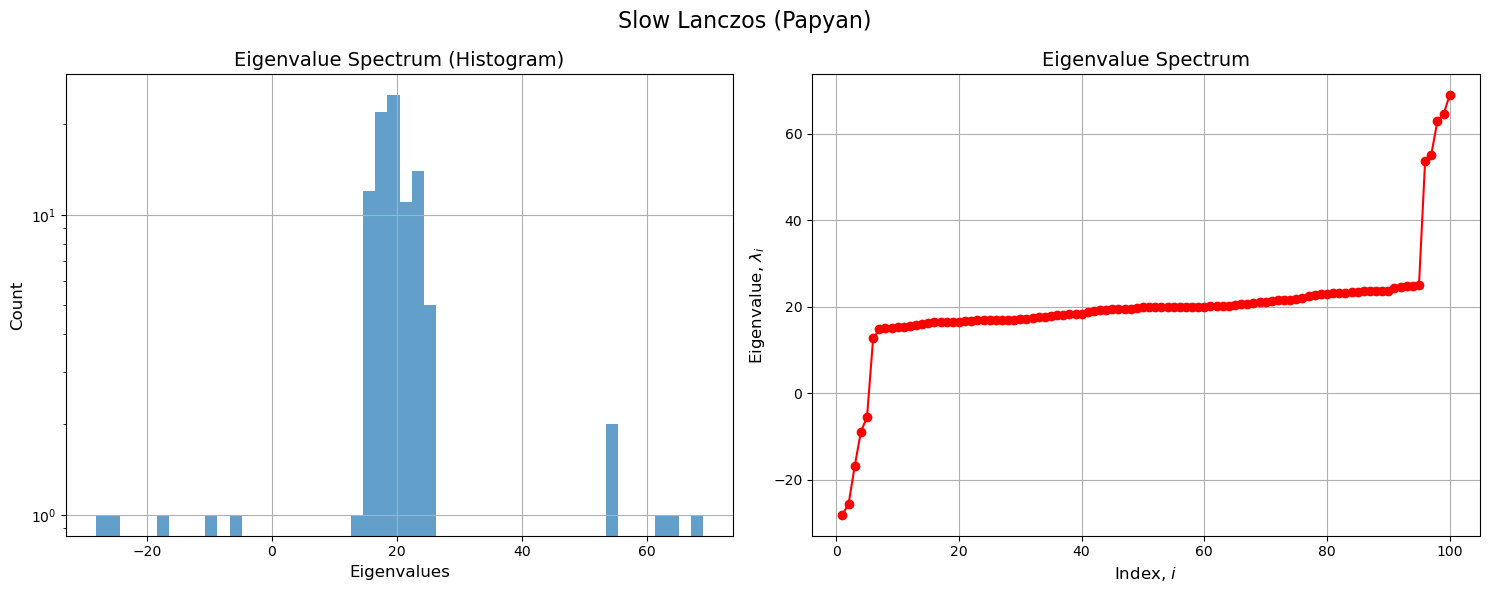

L2 distance: 11.340672492980957


In [10]:
eigenvalues_slow_lanczos_papyan, _, alpha_slow_papyan, beta_slow_papyan = mtx.slow_lanczos_papyan(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_papyan, num_bins=num_bins, title='Slow Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2)}")

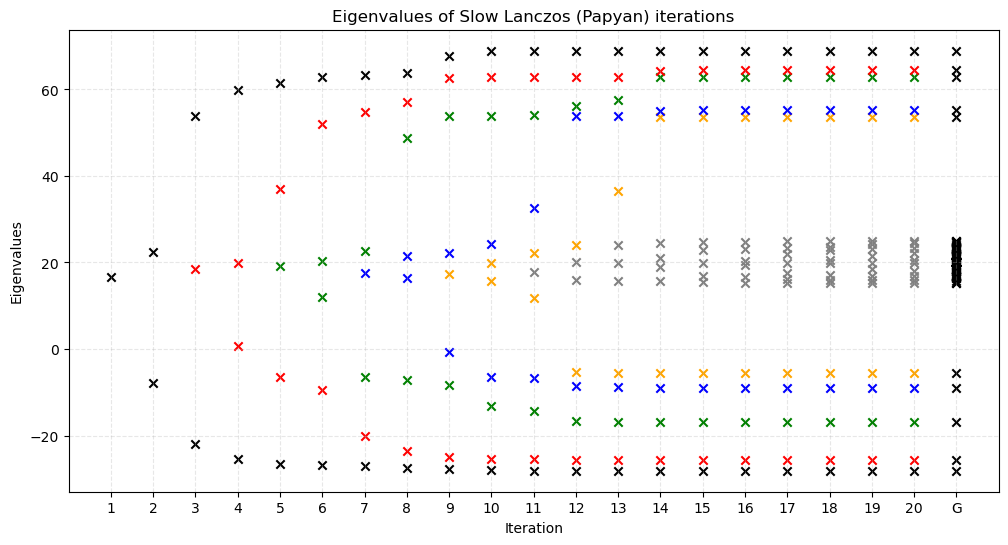

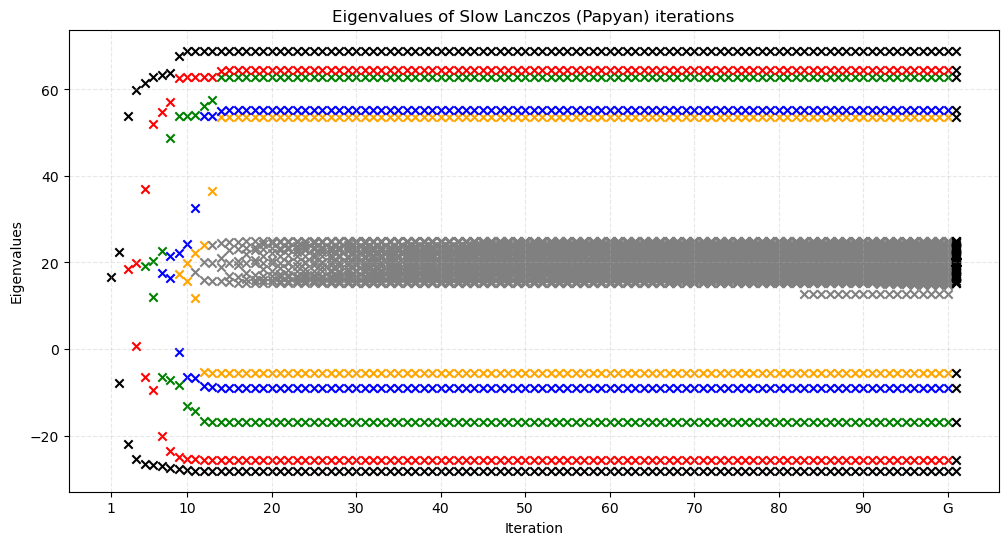

In [11]:
eigenvalues_slow_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")
eigenvalues_slow_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")

#### Slow Lanczos algorithm (Demmel's version)

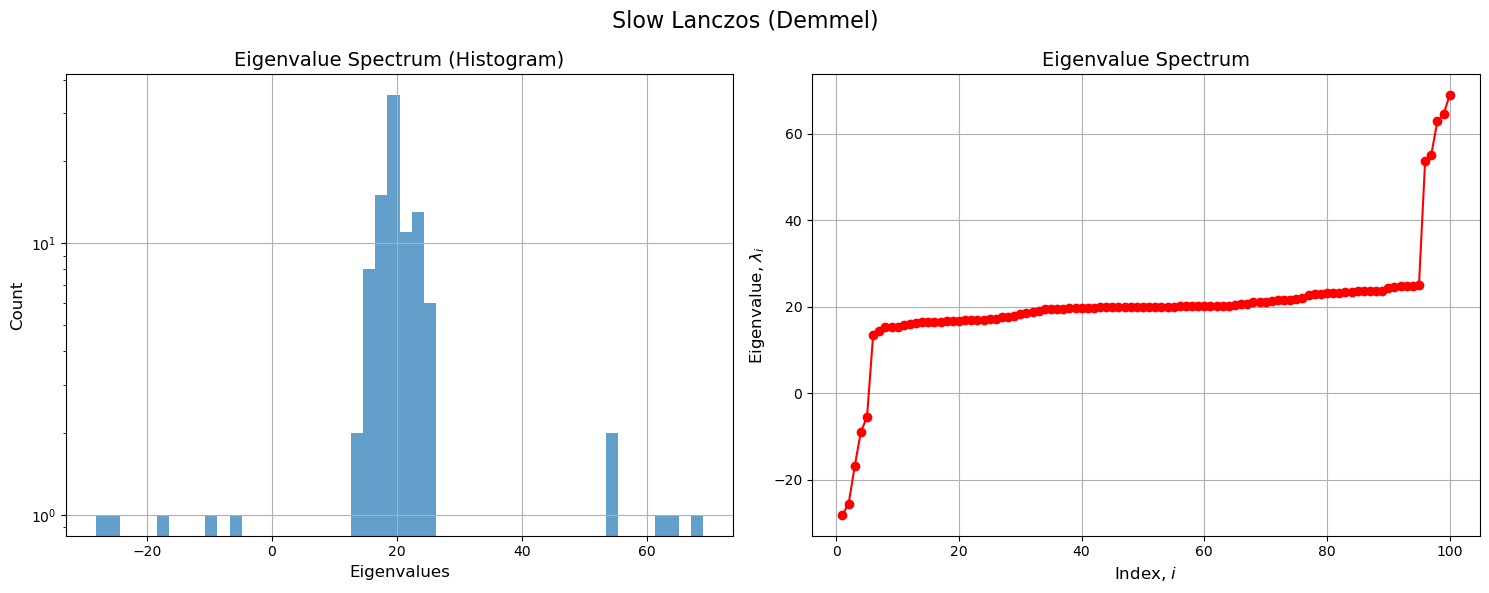

L2 distance: 7.623322486877441


In [12]:
eigenvalues_slow_lanczos_demmel, _, alpha_slow_demmel, beta_slow_demmel = mtx.slow_lanczos_demmel(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_demmel, num_bins=num_bins, title='Slow Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2)}")

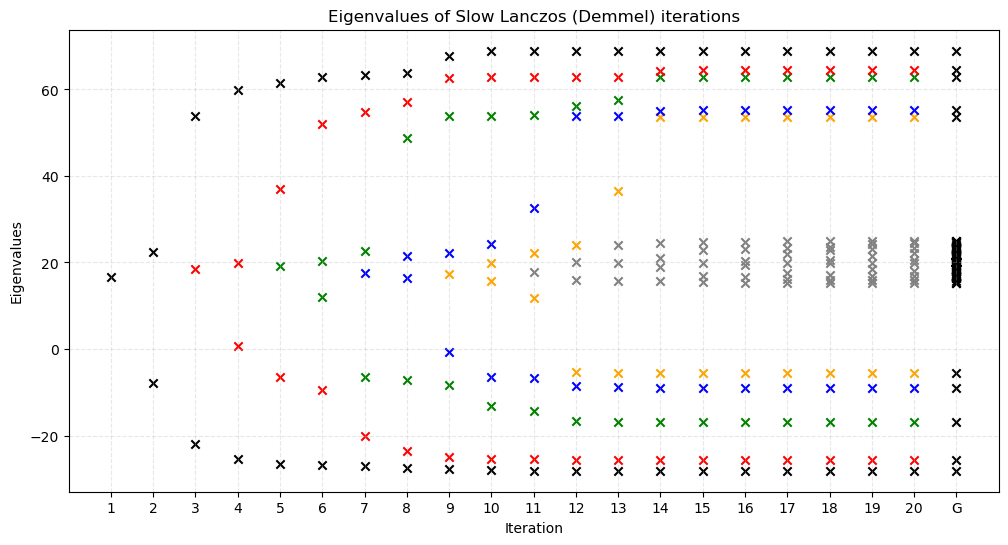

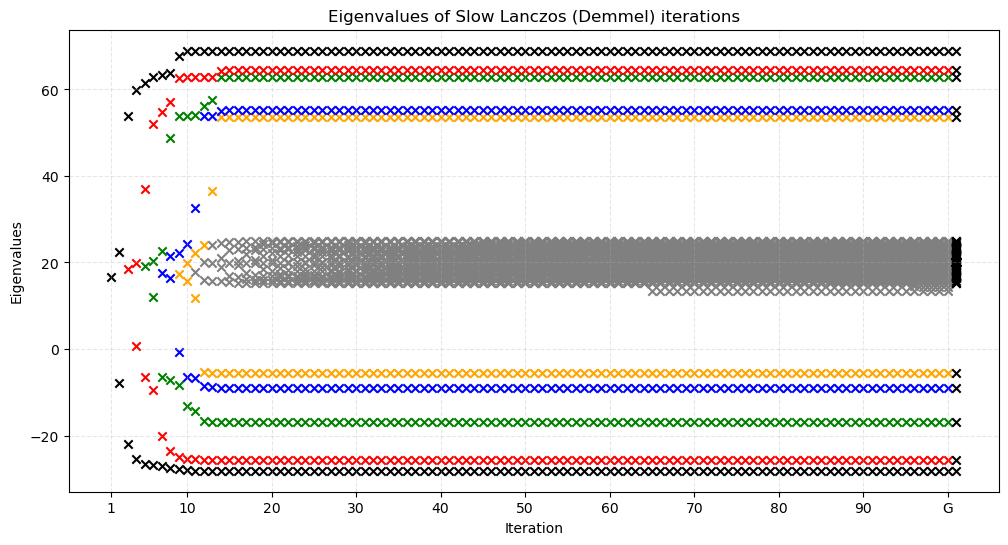

In [13]:
eigenvalues_slow_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")
eigenvalues_slow_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")

#### Fast Lanczos algorithm (Papyan's version)

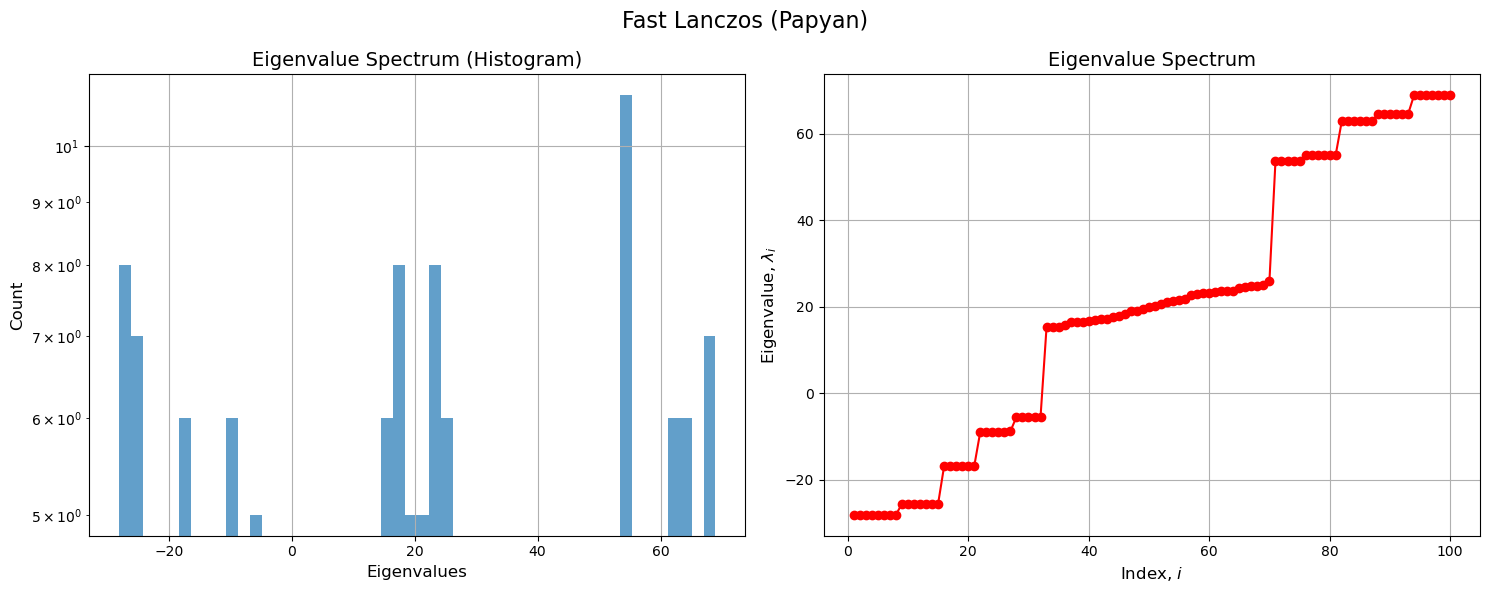

L2 distance: 264.01092529296875


In [14]:
eigenvalues_fast_lanczos_papyan, _, alpha_fast_papyan, beta_fast_papyan =  mtx.fast_lanczos_papyan(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_papyan, num_bins=num_bins, title='Fast Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2)}")

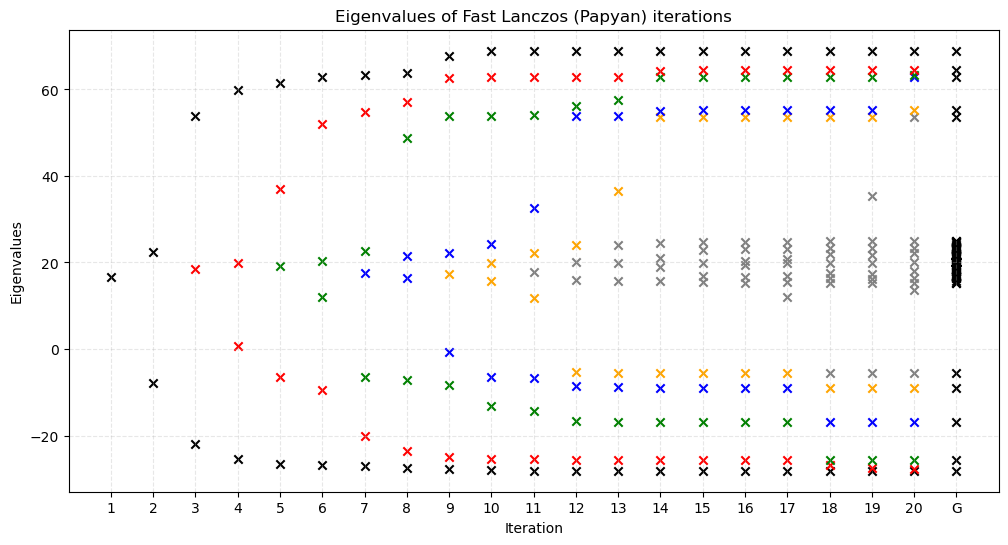

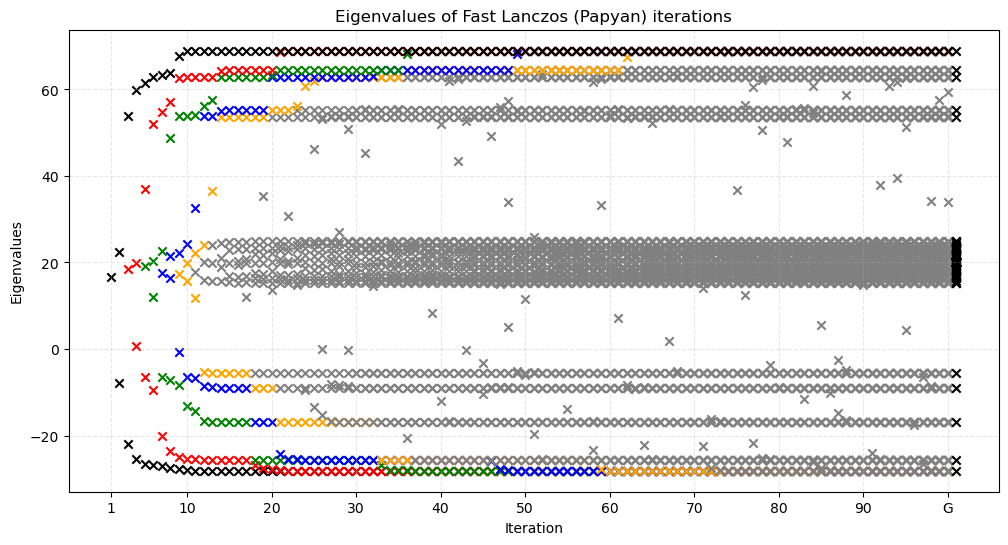

In [15]:
eigenvalues_fast_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")
eigenvalues_fast_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")

#### Fast Lanczos algorithm (Demmel's version)

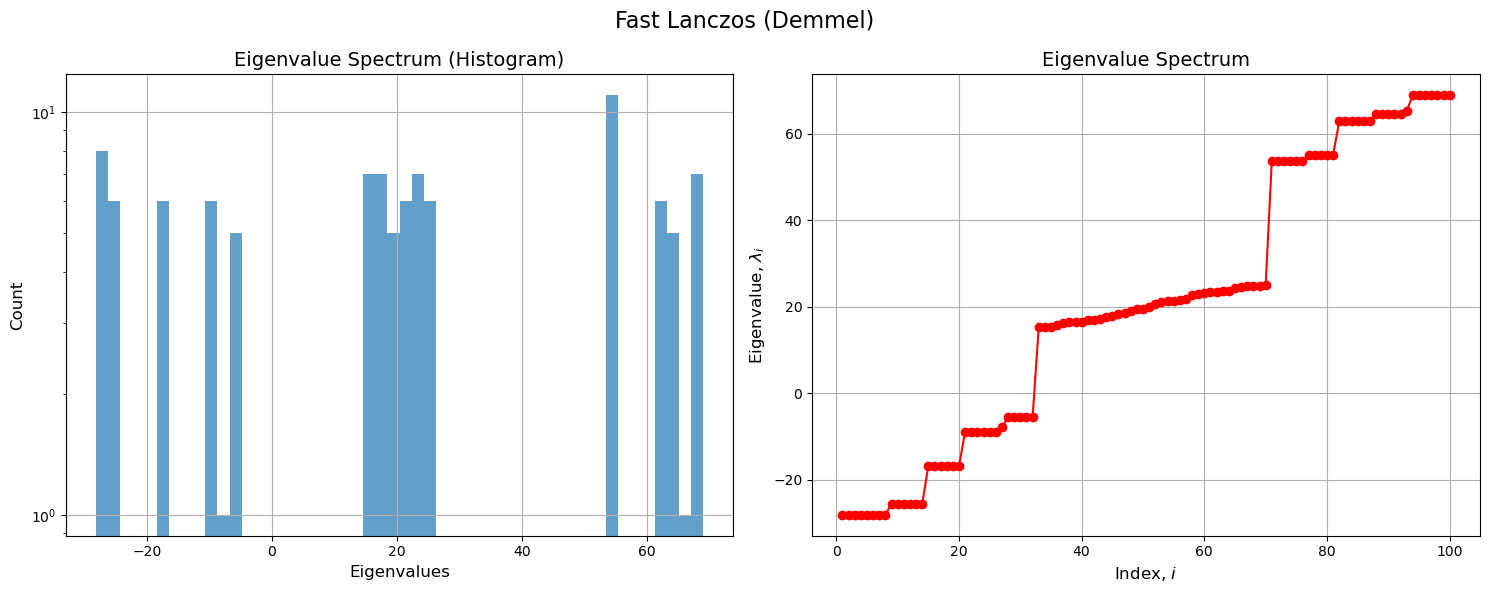

L2 distance: 261.6435546875


In [16]:
eigenvalues_fast_lanczos_demmel, _, alpha_fast_demmel, beta_fast_demmel =  mtx.fast_lanczos_demmel(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_demmel, num_bins=num_bins, title='Fast Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2)}")

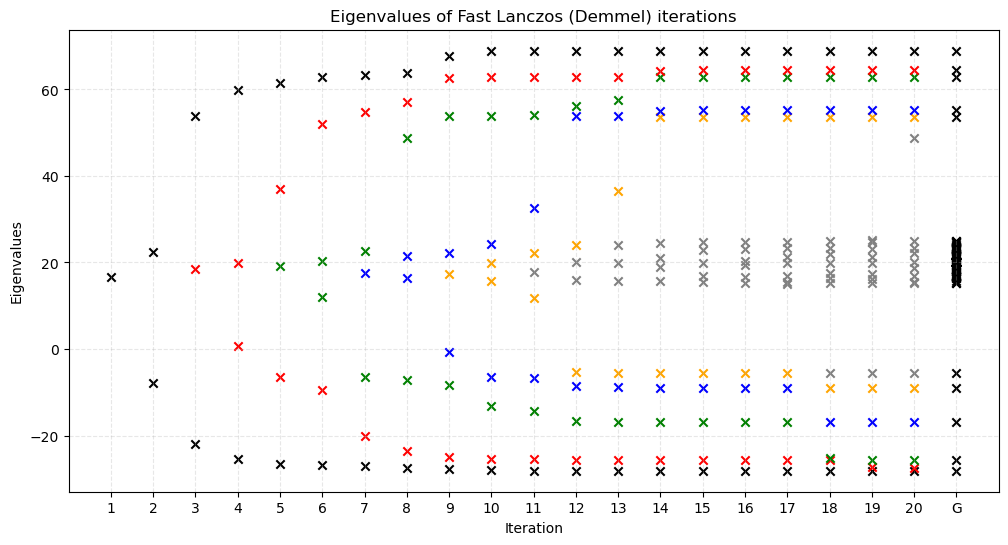

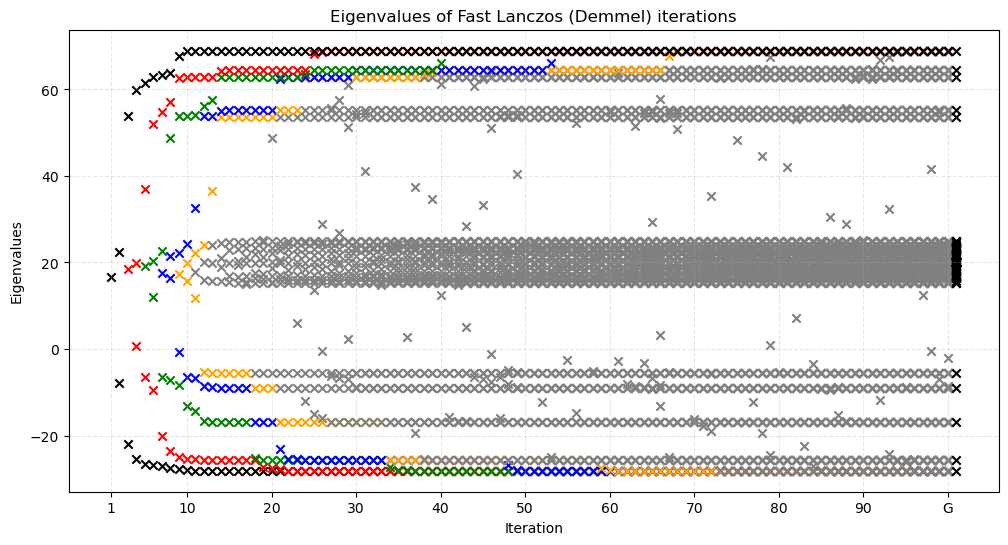

In [17]:
eigenvalues_fast_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")
eigenvalues_fast_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")

#### $d$-Lanczos (PyHessian's version)

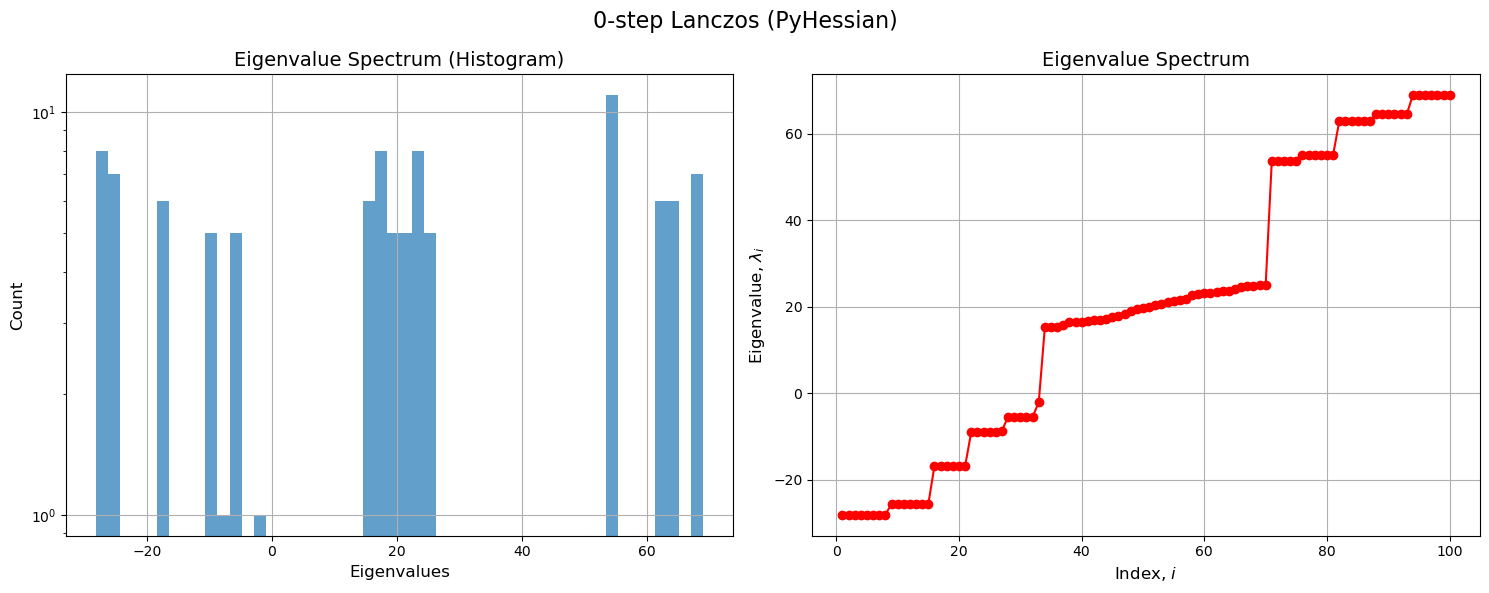

L2 distance: 264.87060546875


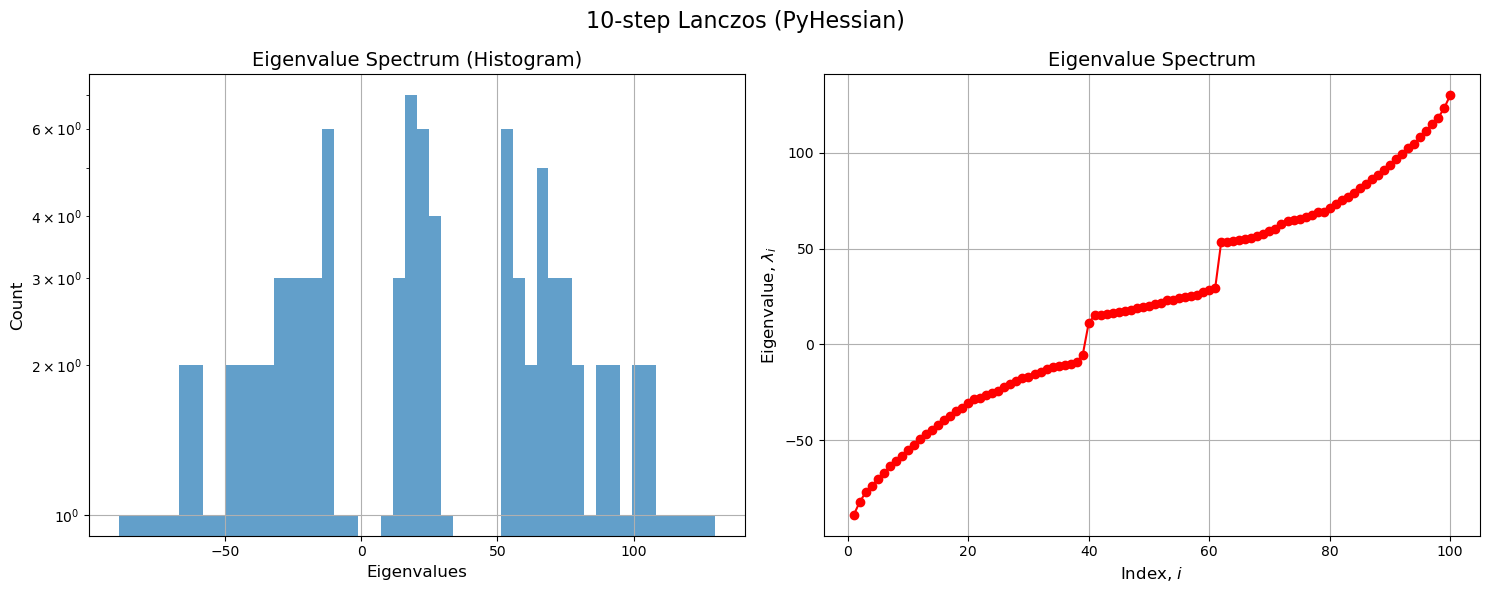

L2 distance: 473.25152587890625


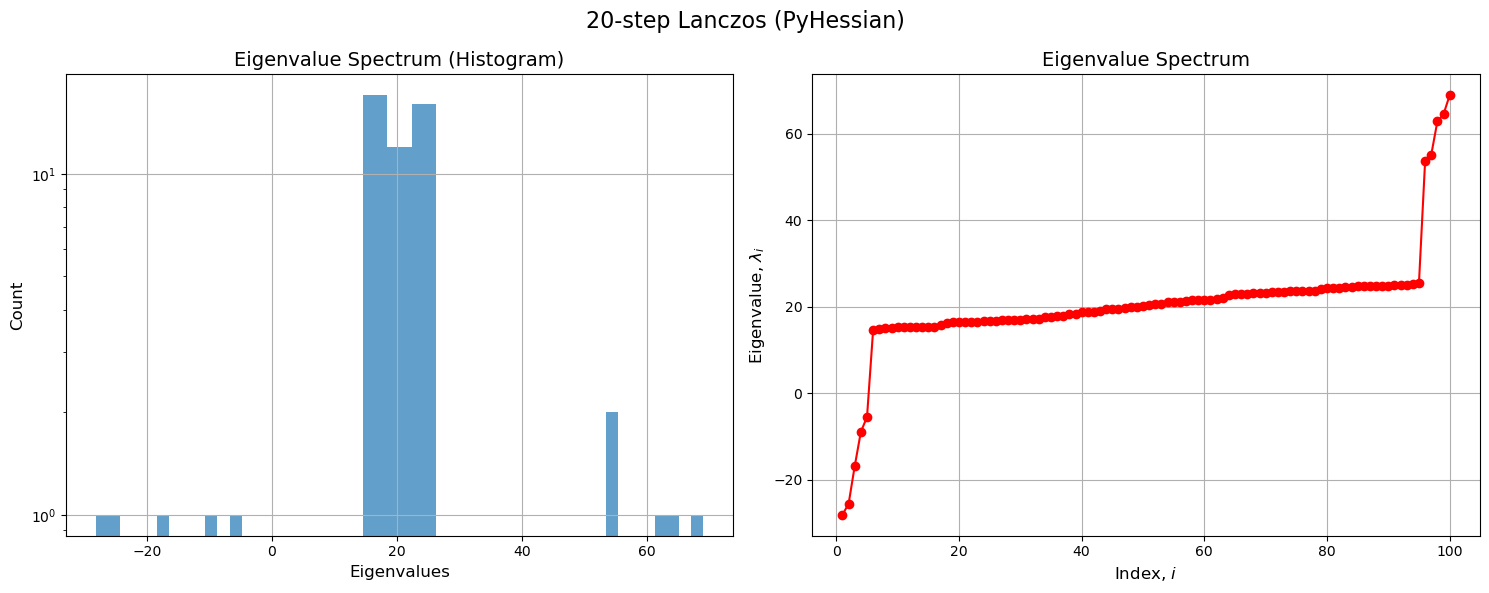

L2 distance: 16.34543228149414


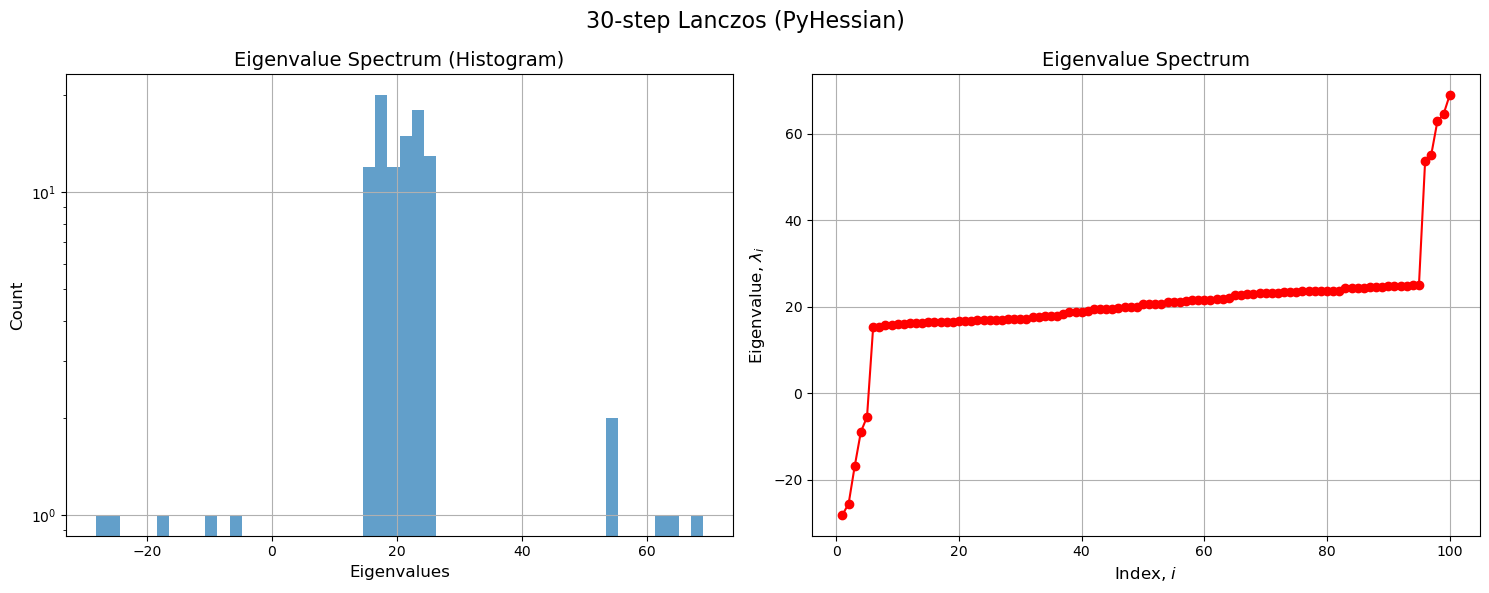

L2 distance: 14.302114486694336


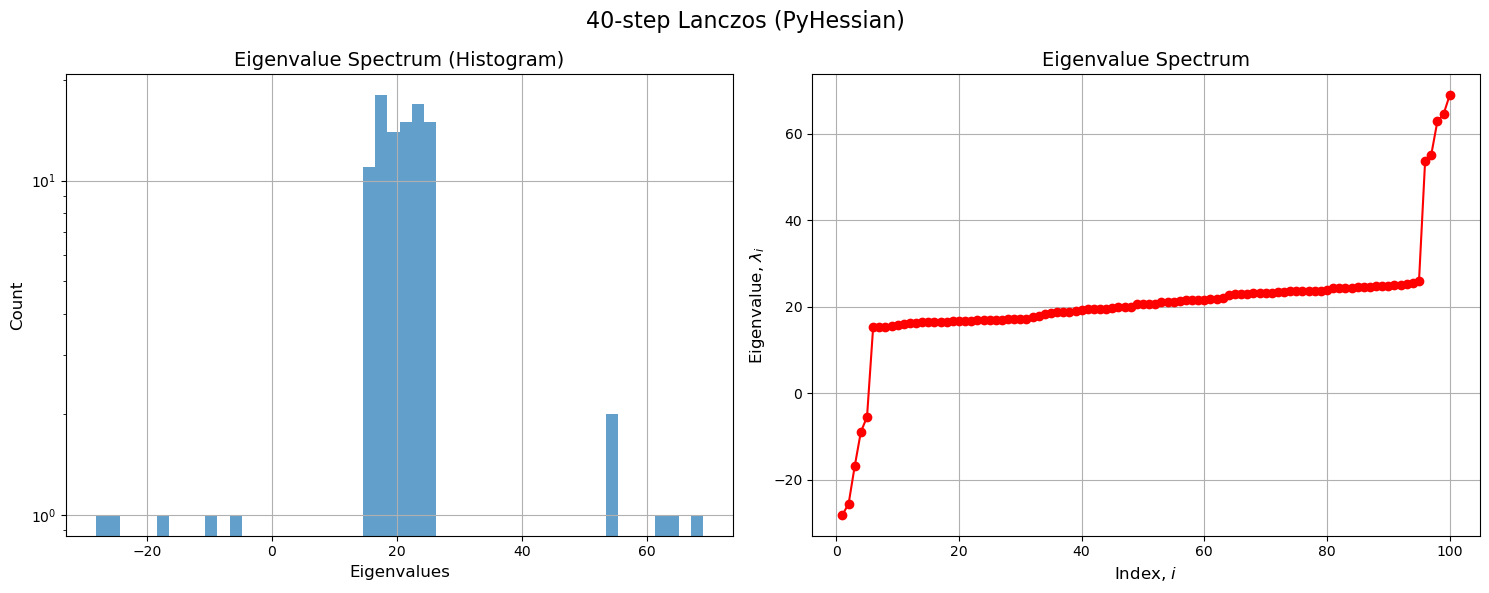

L2 distance: 14.52275276184082


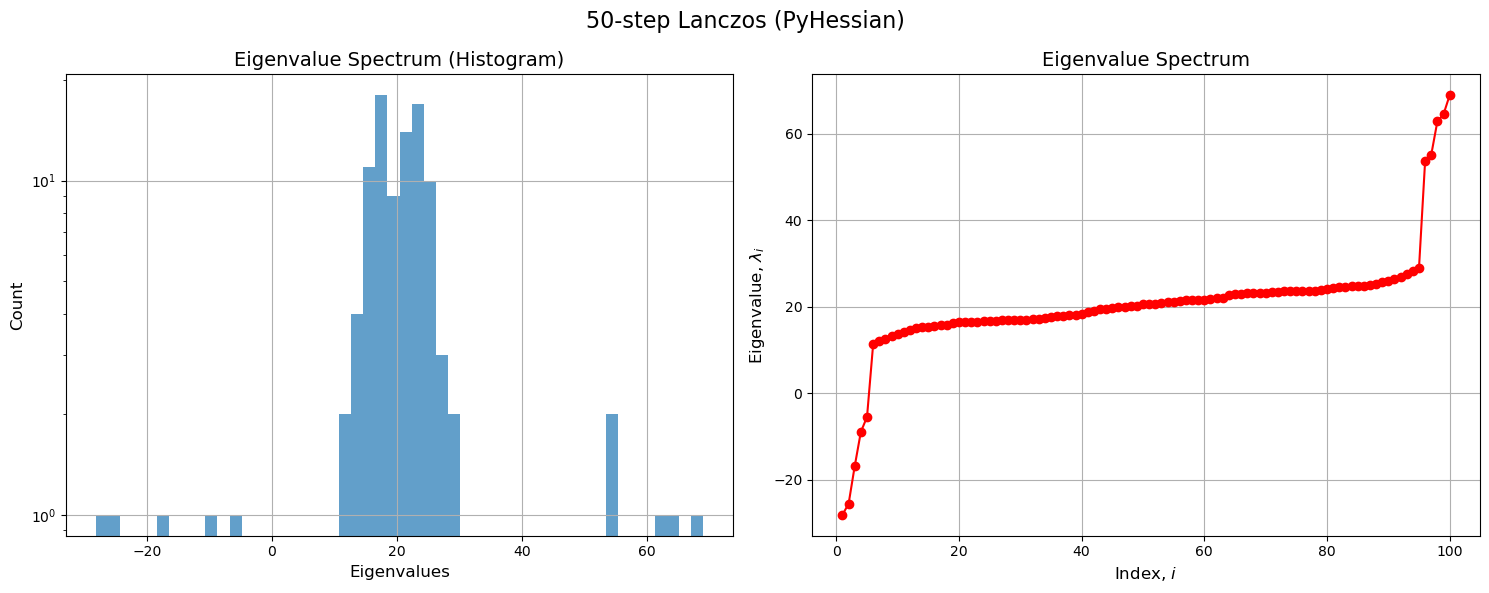

L2 distance: 19.690202713012695


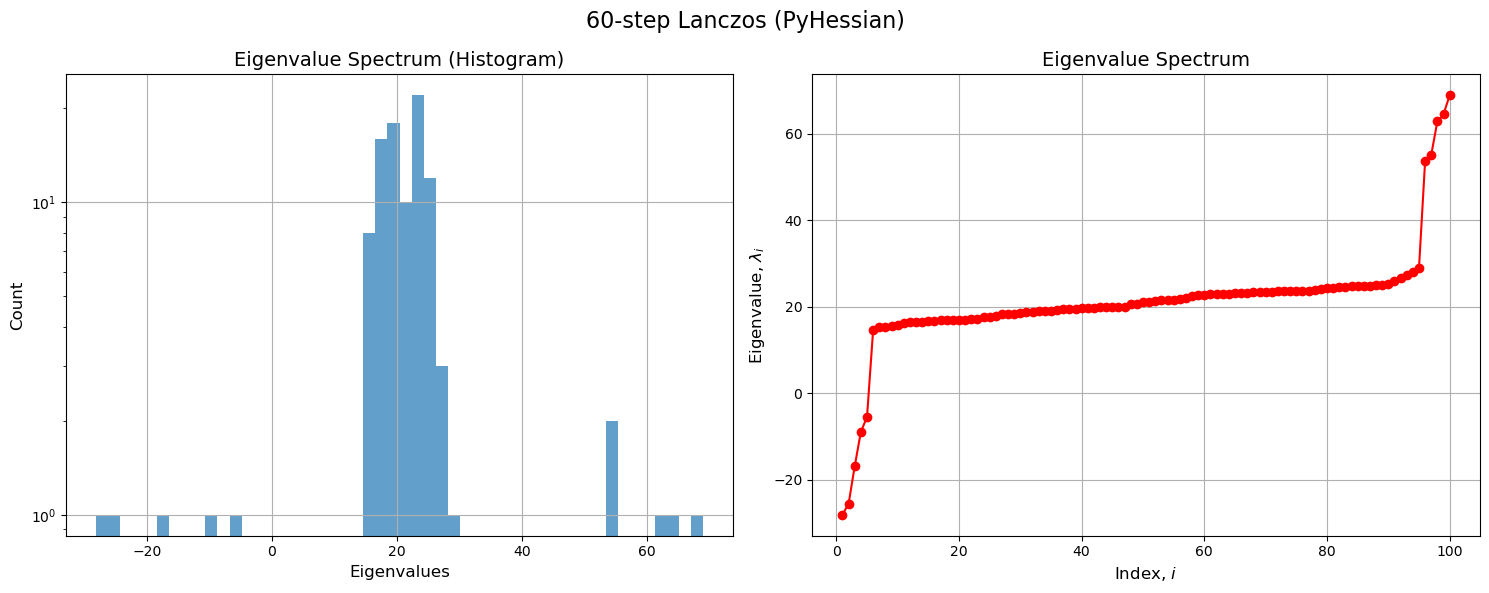

L2 distance: 15.813745498657227


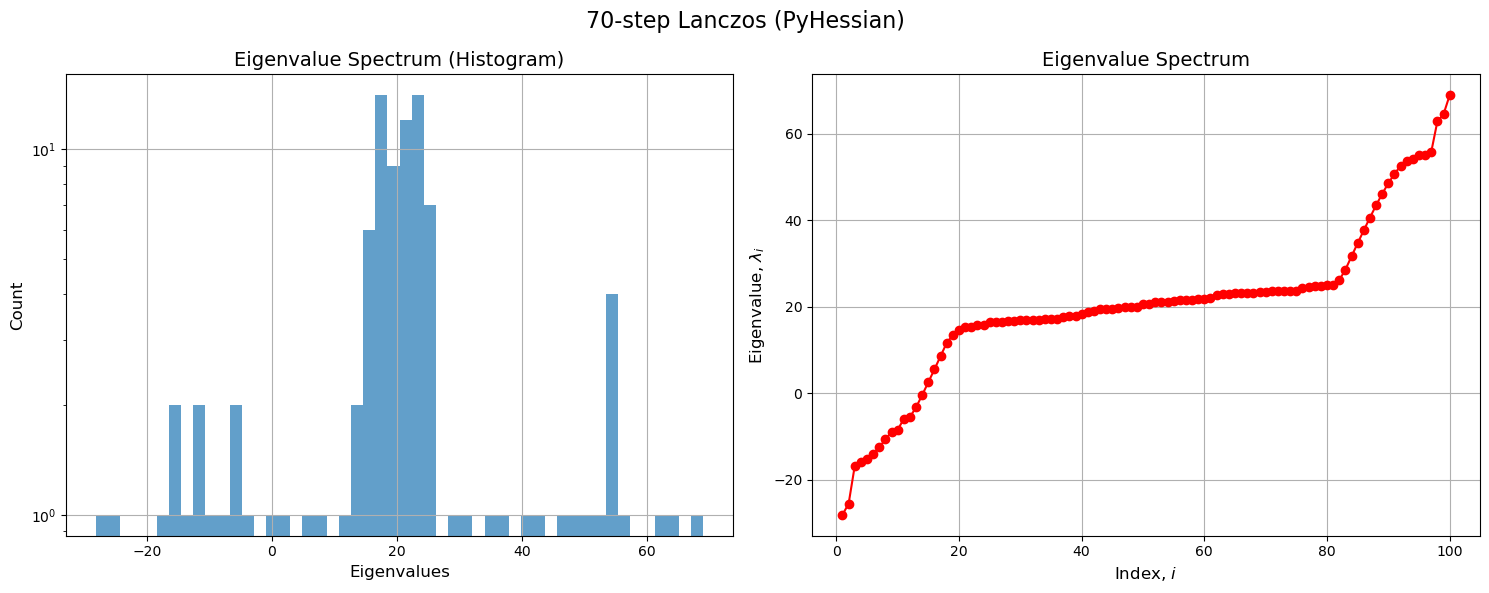

L2 distance: 112.01402282714844


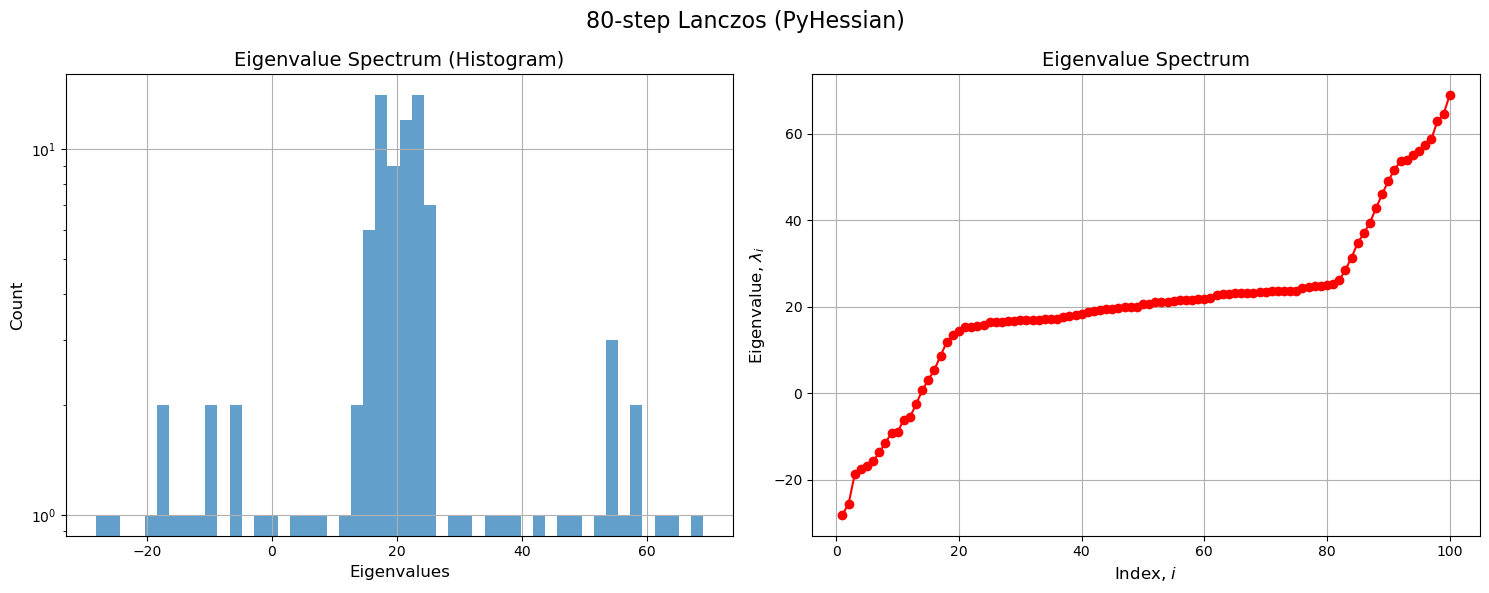

L2 distance: 114.0315933227539


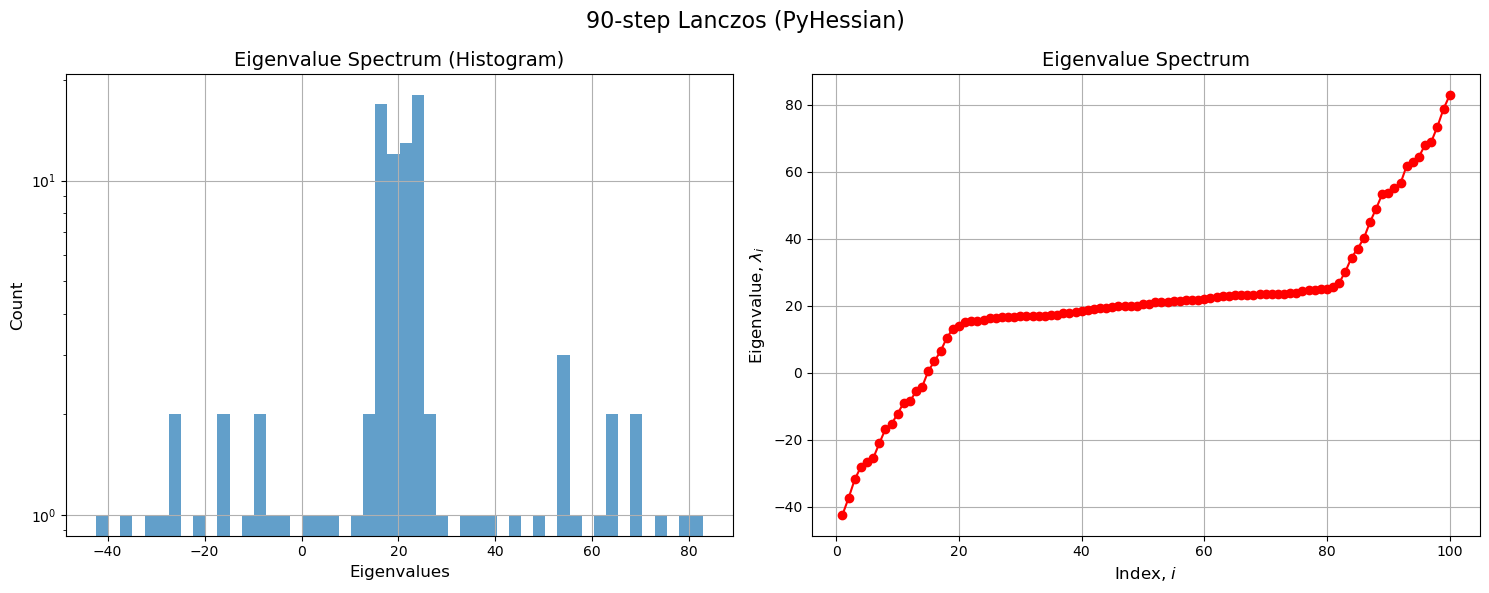

L2 distance: 145.737548828125


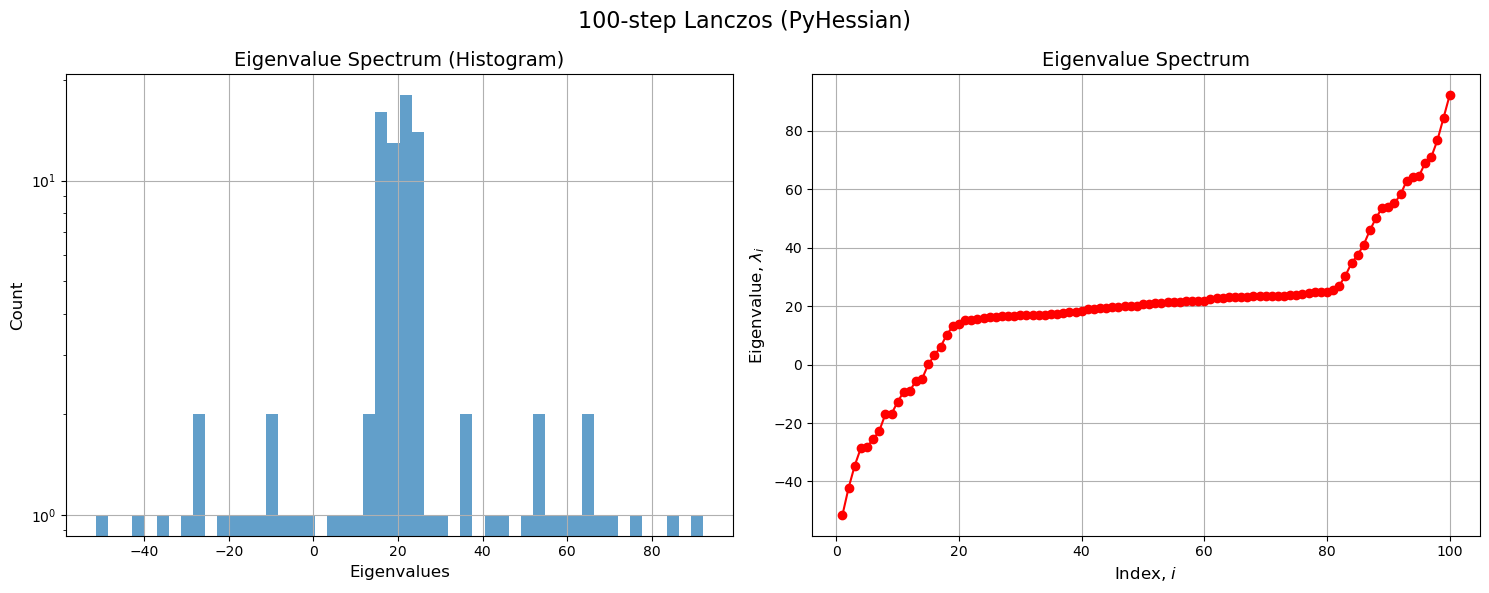

L2 distance: 153.06529235839844


In [18]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_pyhessian, _, _, _ = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_pyhessian, num_bins=num_bins, title=f'{d}-step Lanczos (PyHessian)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_pyhessian), 2)}")

#### $d$-Lanczos (Papyan's version)

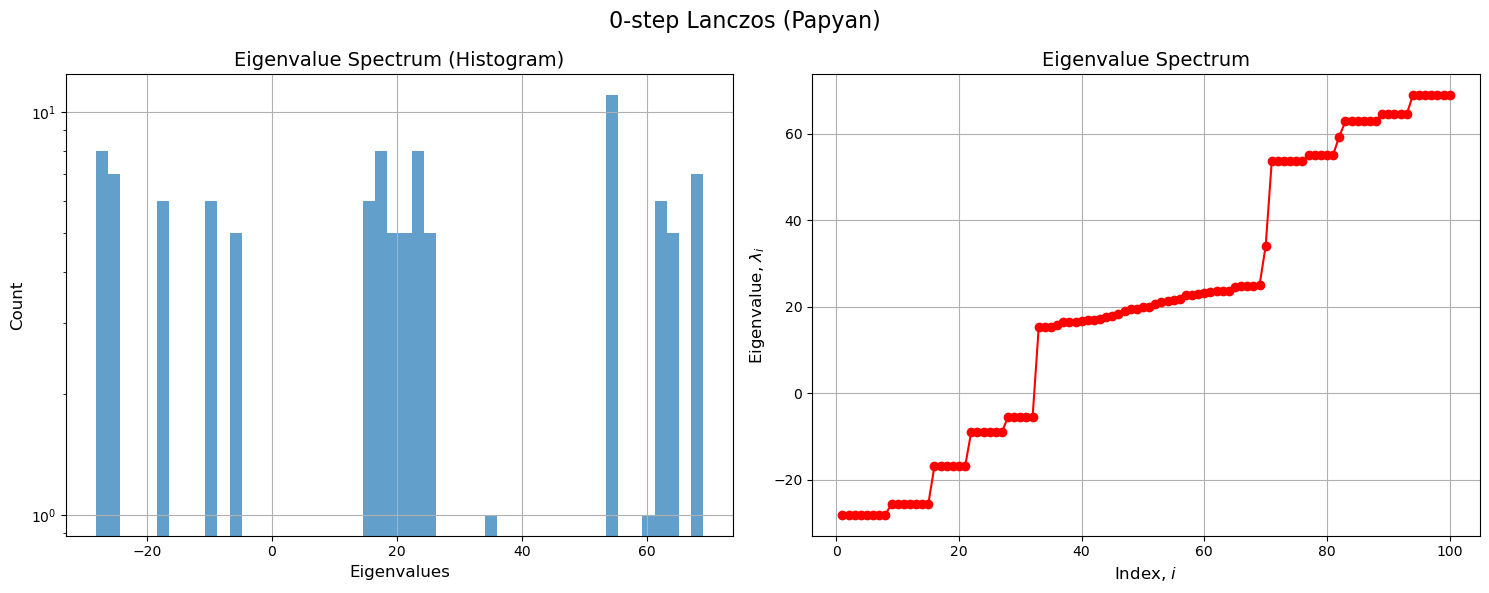

L2 distance: 263.385986328125


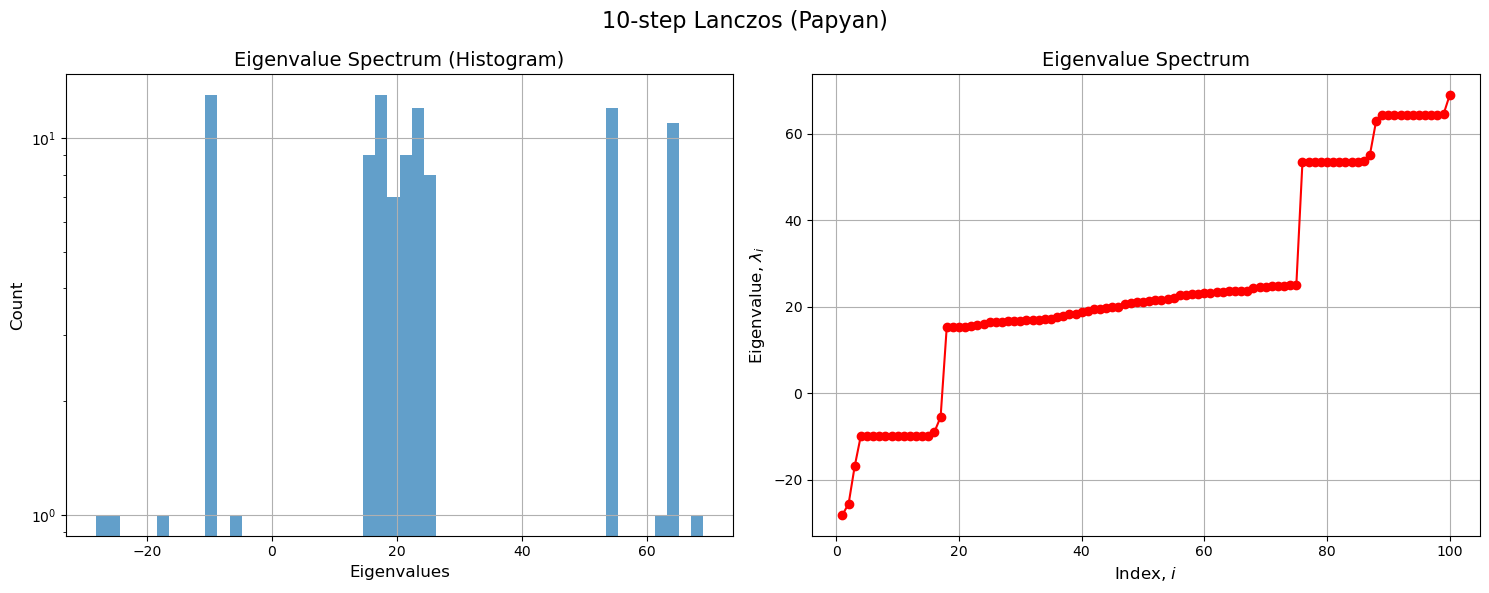

L2 distance: 180.7586669921875


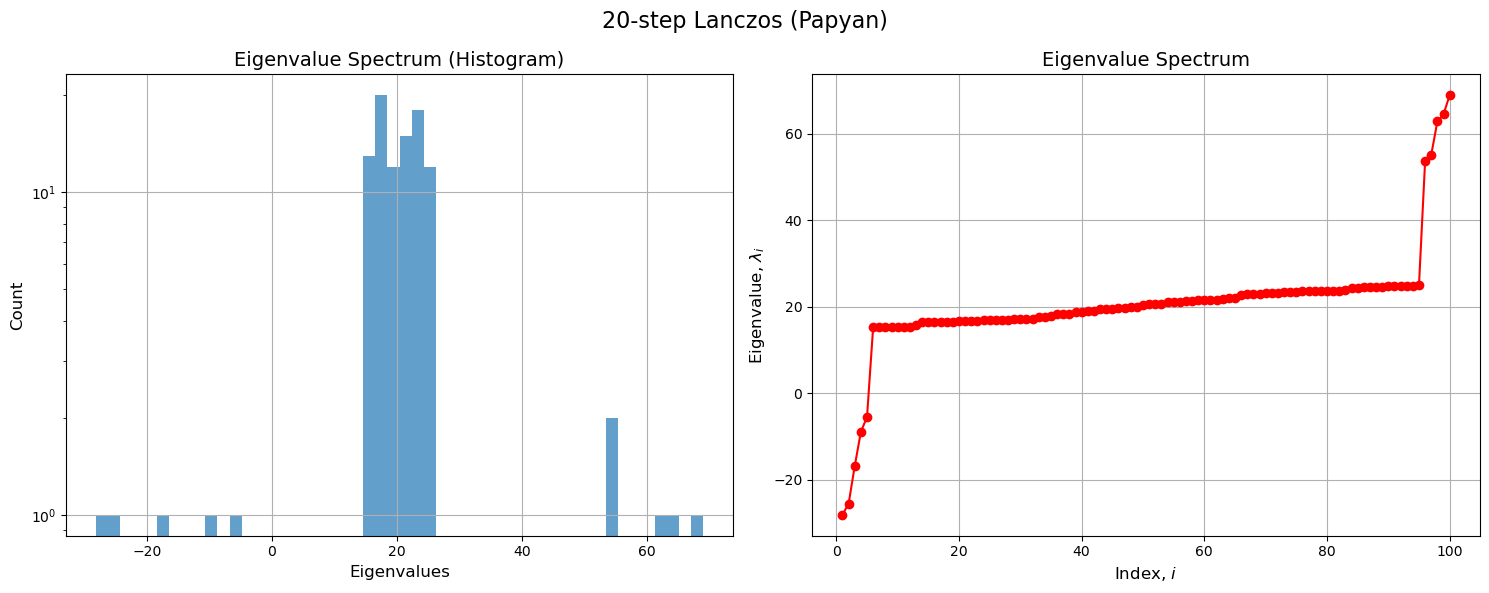

L2 distance: 14.380331039428711


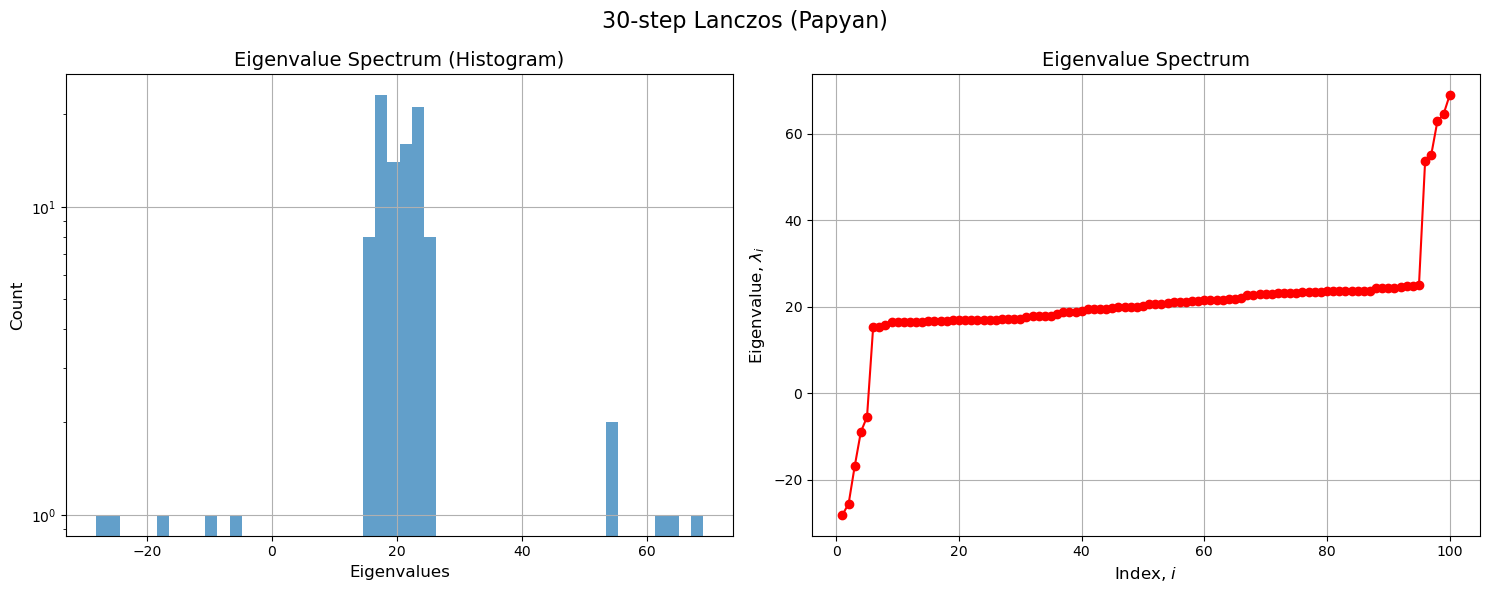

L2 distance: 12.704693794250488


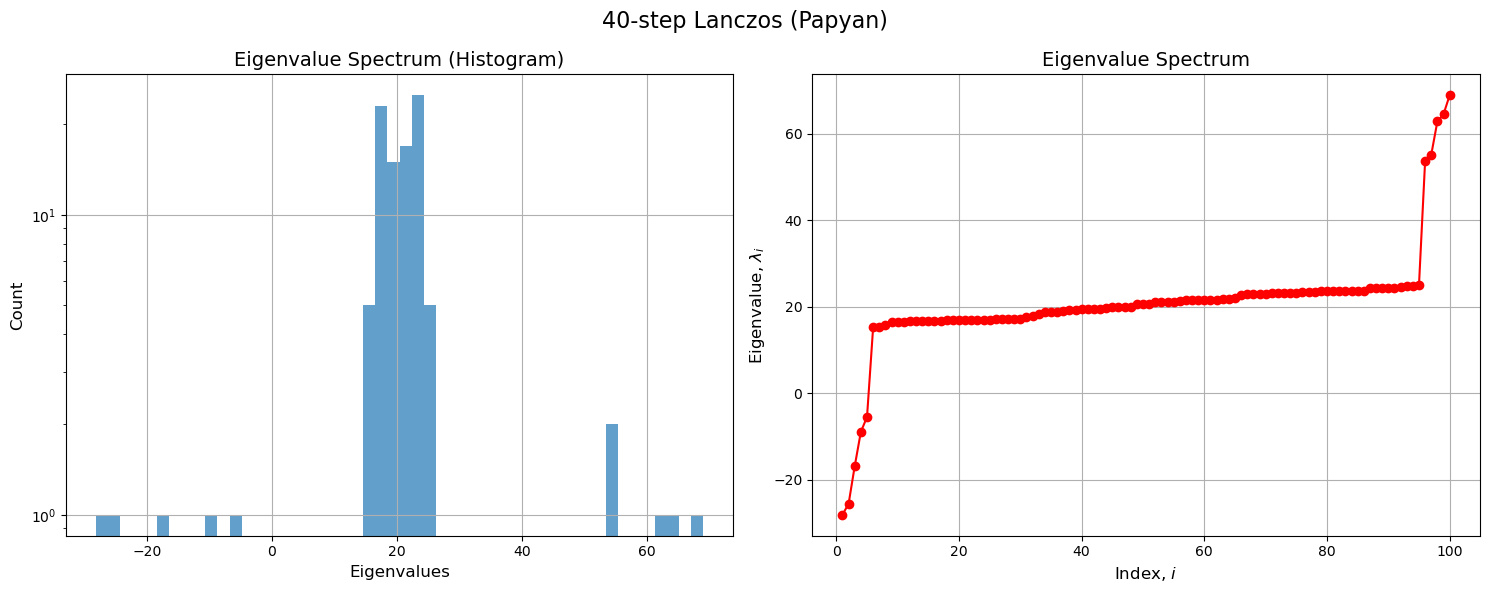

L2 distance: 12.622044563293457


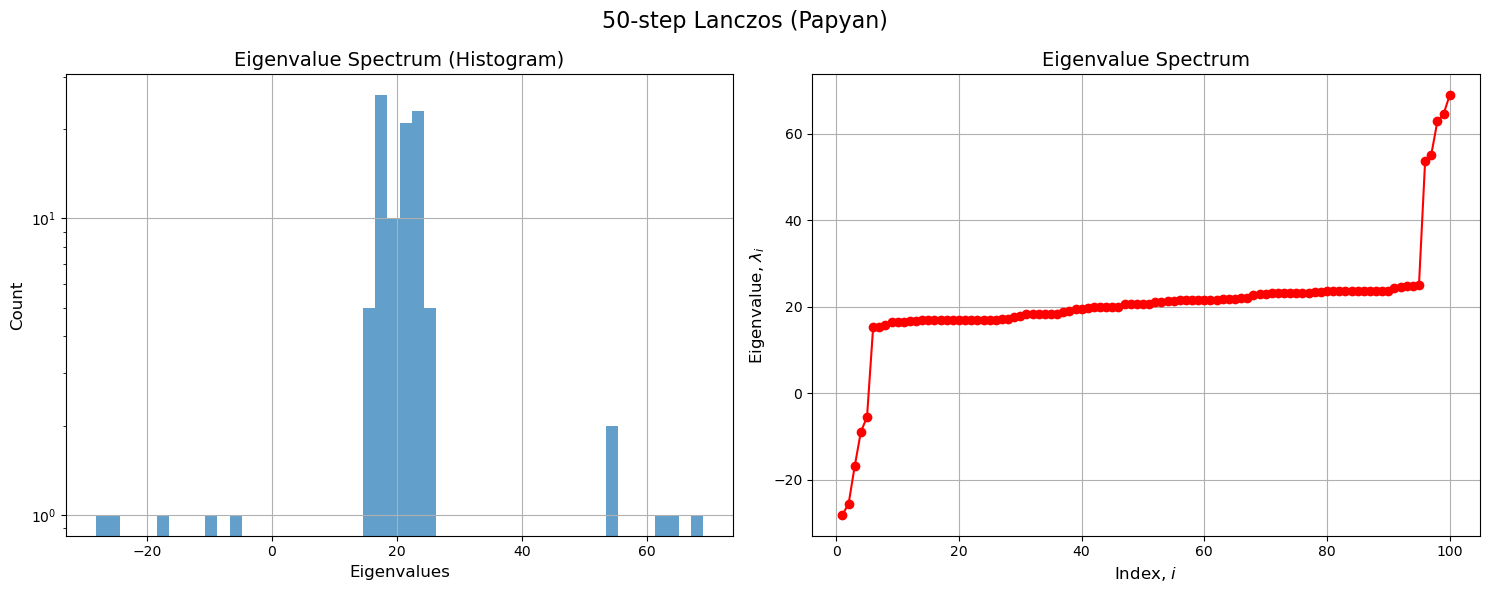

L2 distance: 12.051568031311035


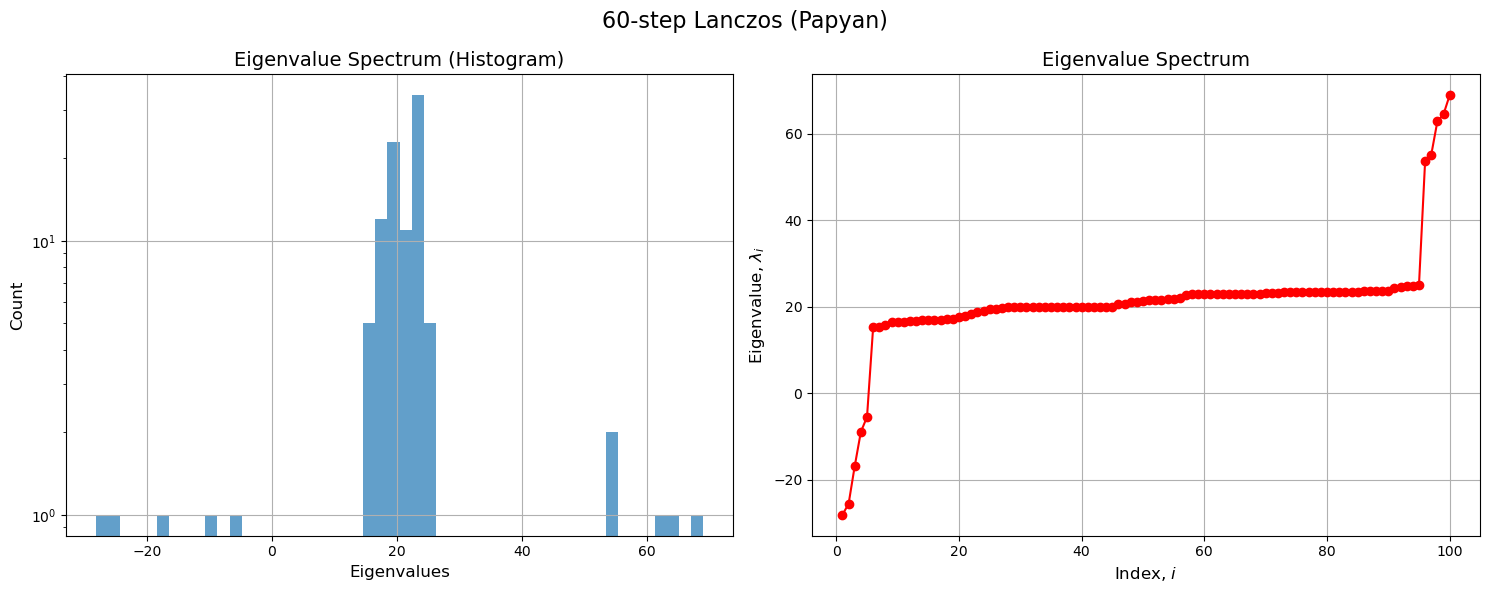

L2 distance: 12.294438362121582


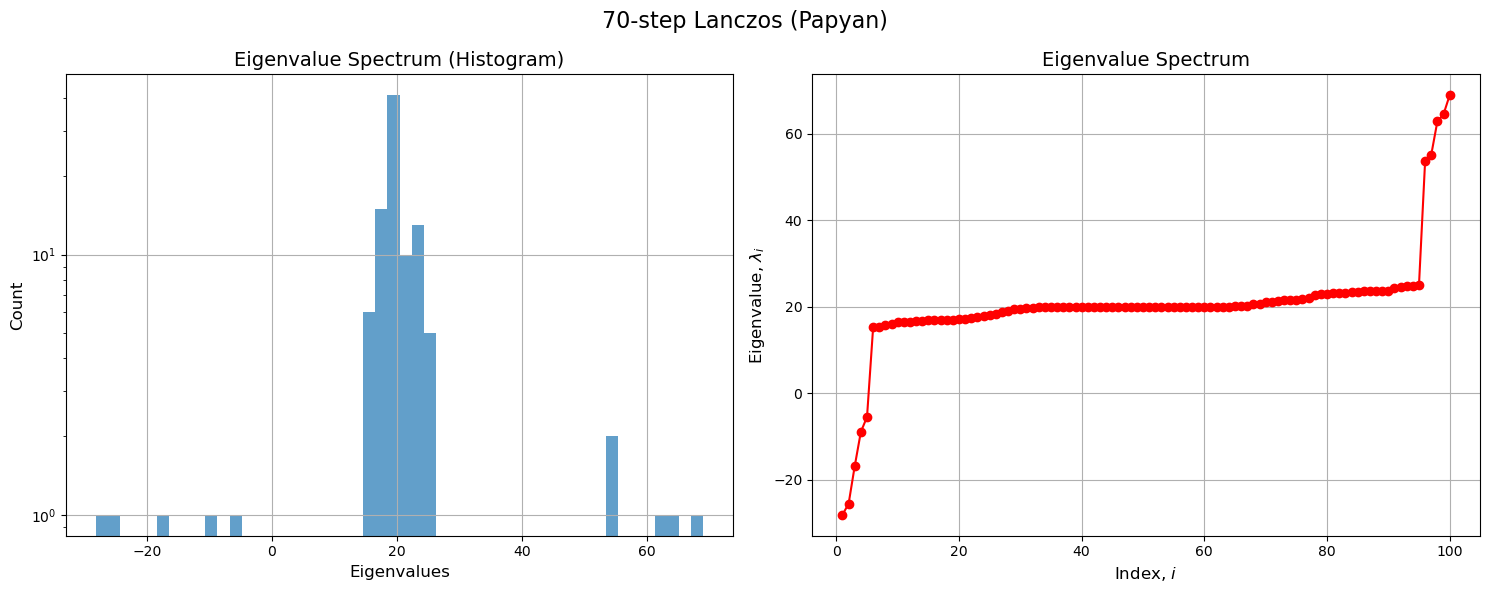

L2 distance: 3.155066967010498


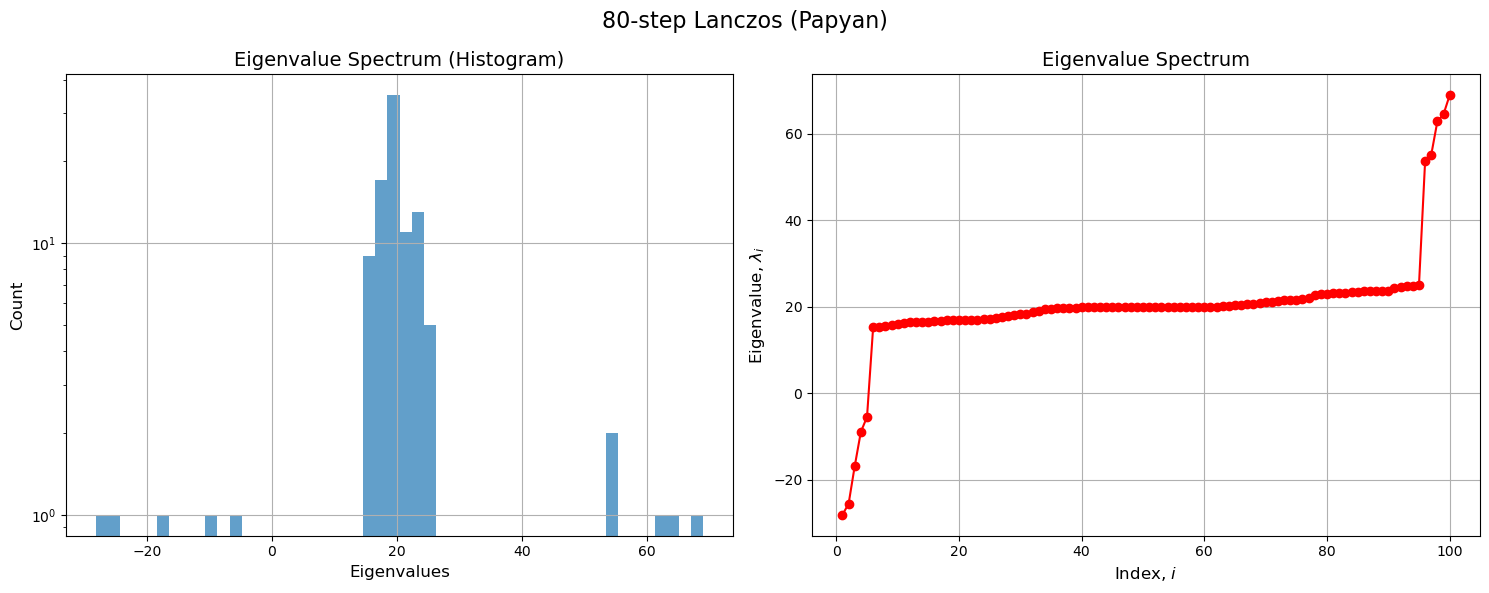

L2 distance: 6.508948802947998


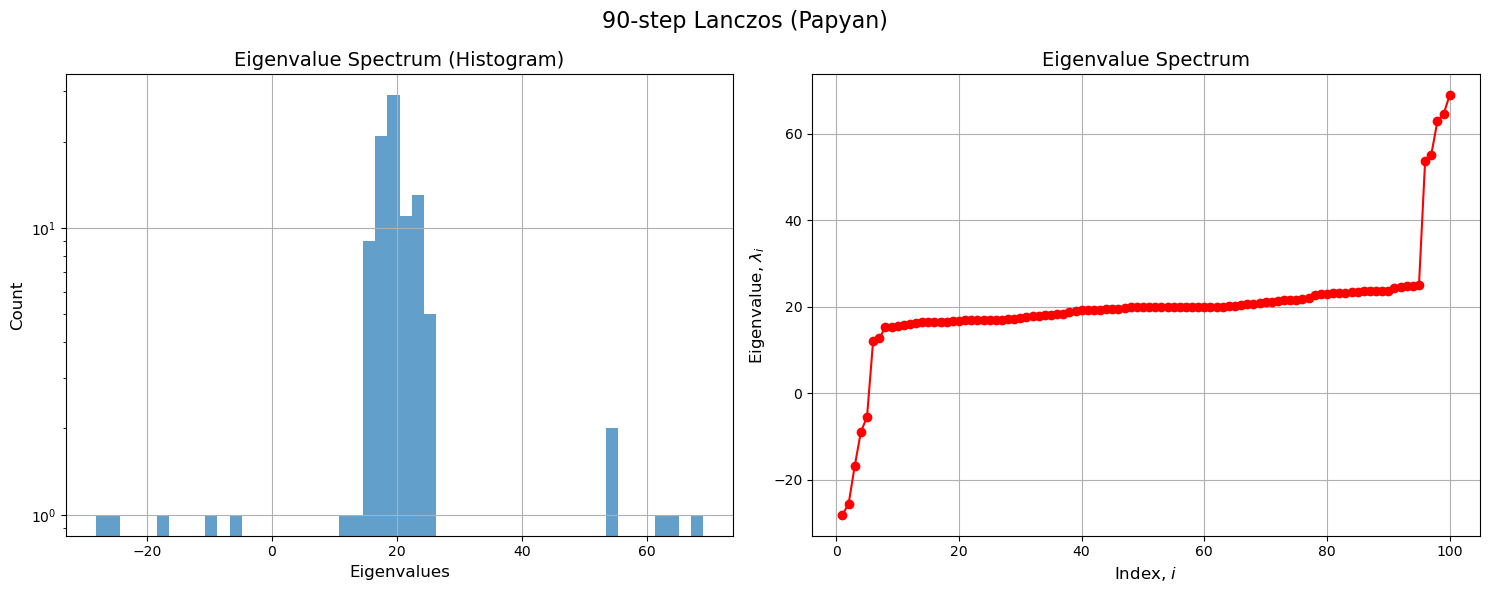

L2 distance: 10.417627334594727


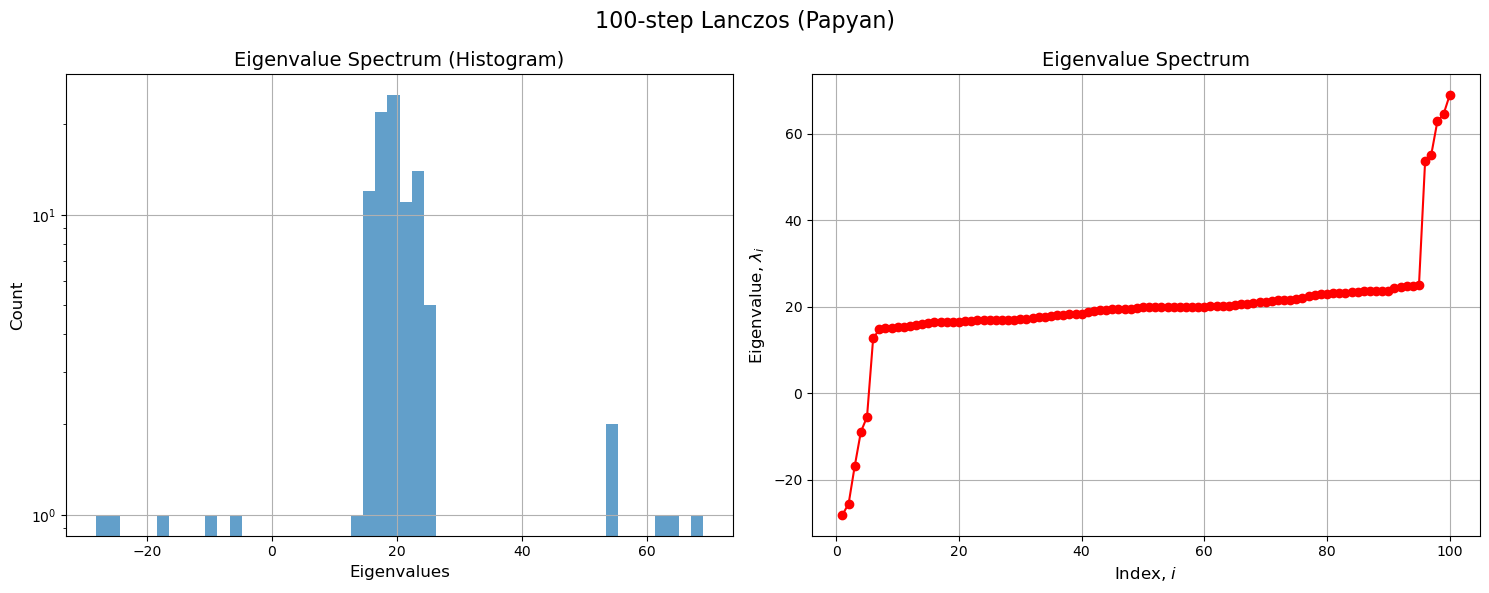

L2 distance: 11.340672492980957


In [19]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_papyan, _, _, _ = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_papyan, num_bins=num_bins, title=f'{d}-step Lanczos (Papyan)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_papyan), 2)}")

#### 15-Lanczos (PyHessian's version)

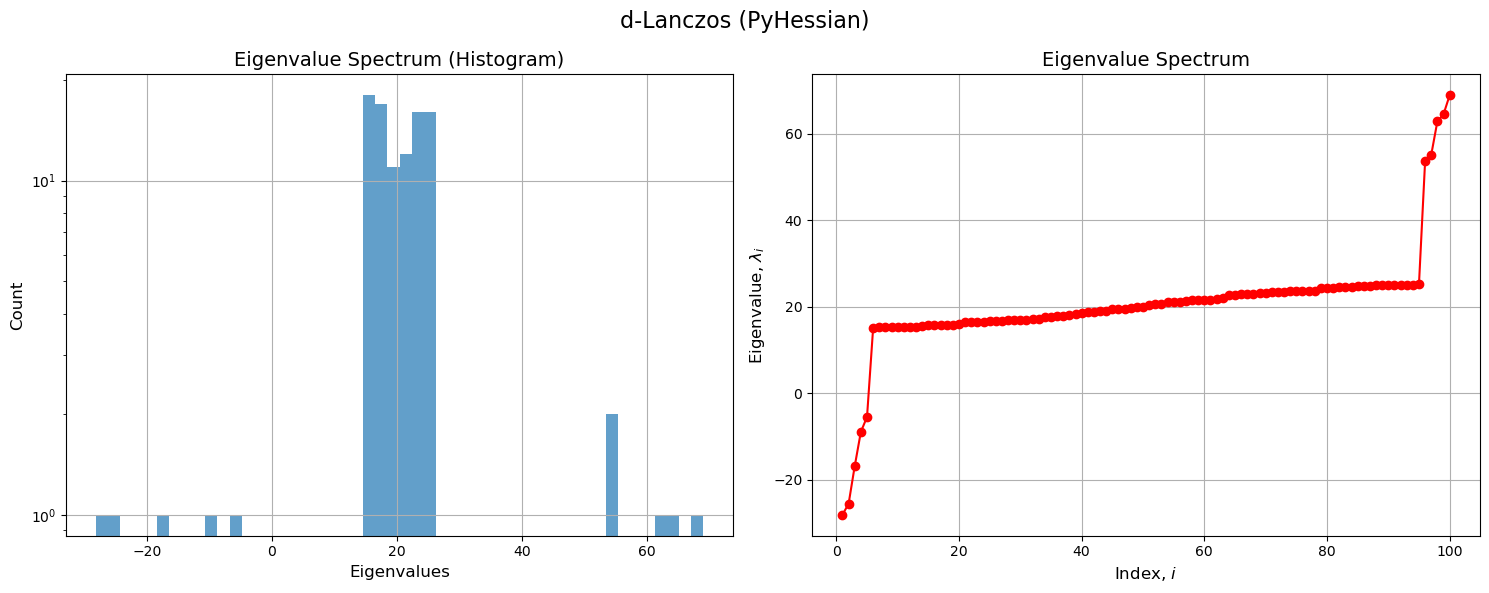

L2 distance: 16.583114624023438


In [20]:
d_value_pyhessian = 15
eigenvalues_d_lanzcos_pyhessian, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d_value_pyhessian)
plot_spectrum_combined(eigenvalues_d_lanzcos_pyhessian, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2)}")

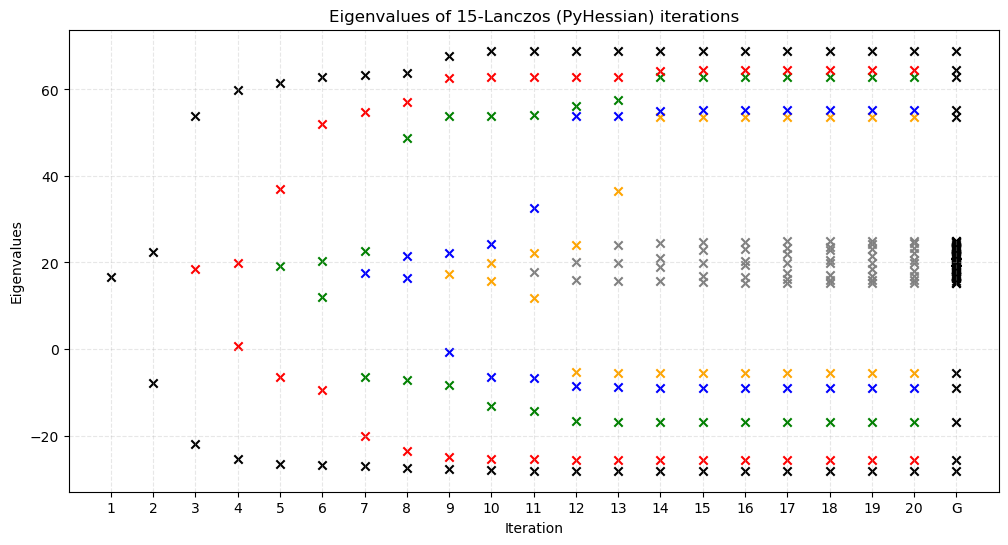

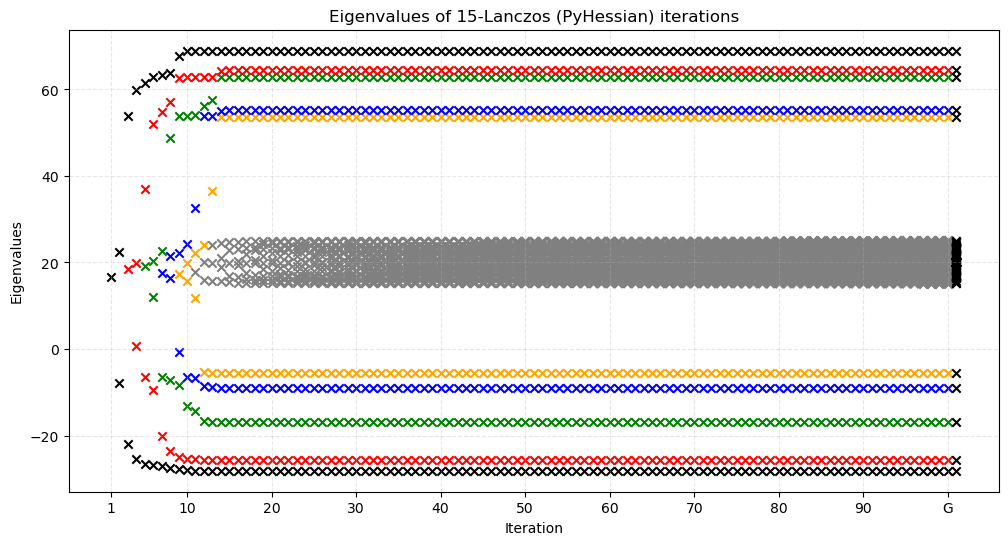

In [21]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")

#### 15-Lanczos (Papyan's version)

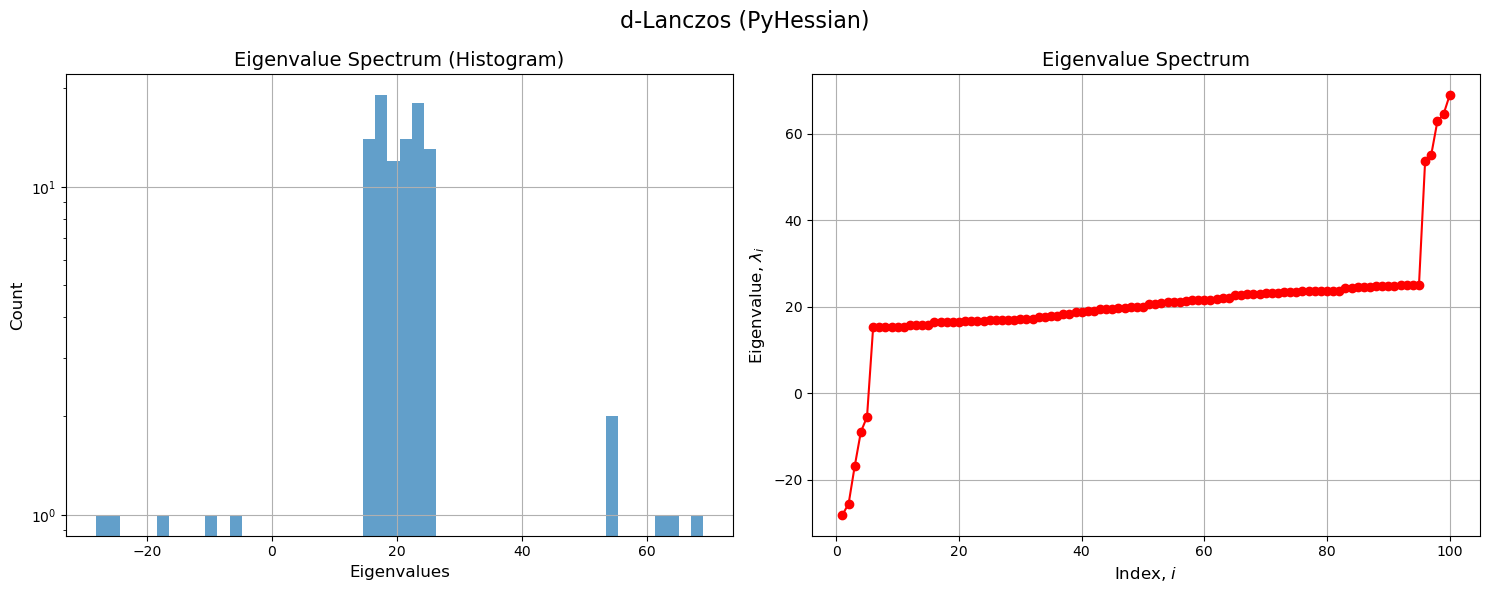

L2 distance: 14.835759162902832


In [22]:
d_value_papyan = 15
eigenvalues_d_lanzcos_papyan, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d_value_papyan)
plot_spectrum_combined(eigenvalues_d_lanzcos_papyan, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2)}")

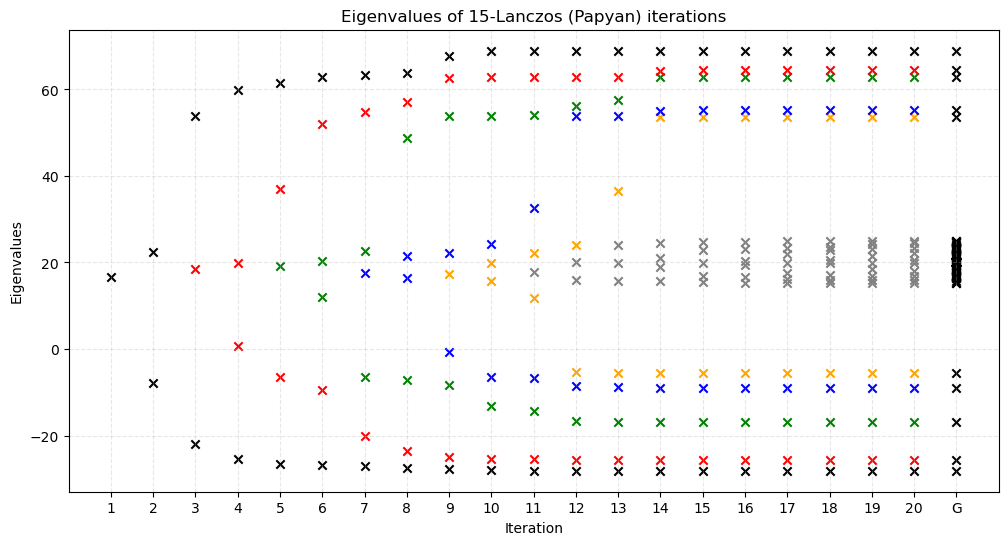

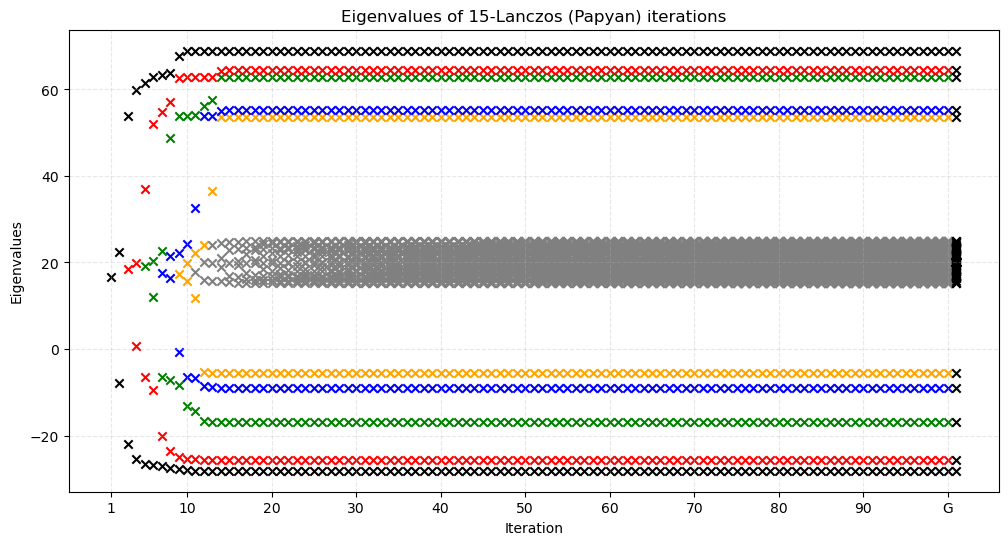

In [23]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")

#### Compare eigenvalues obtained by different algorithms

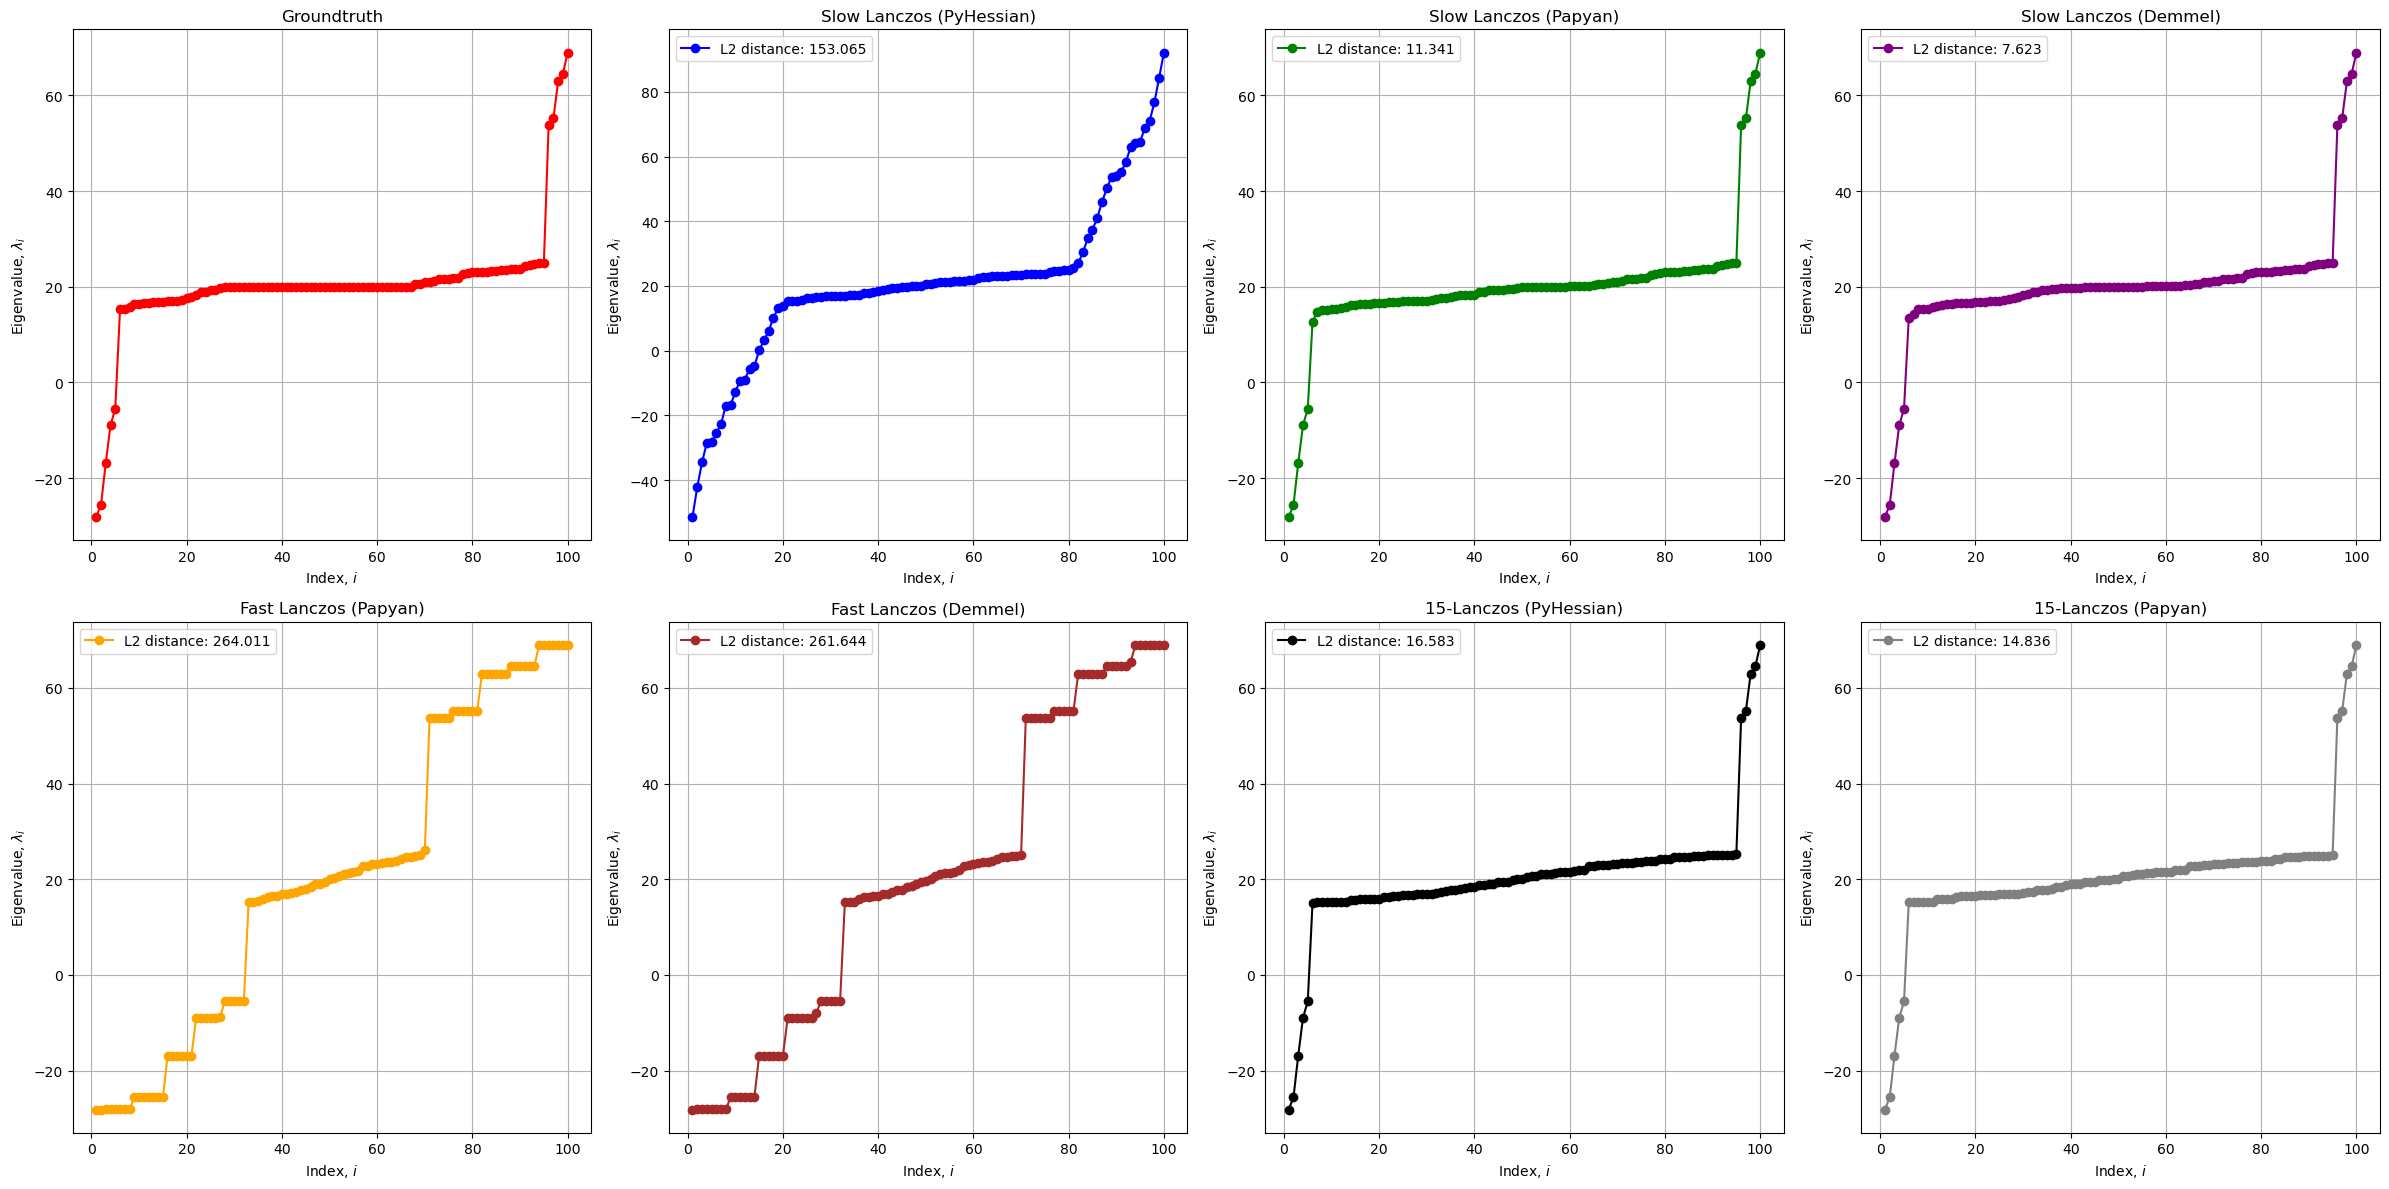

In [24]:
# convert to torch tensors
eigenvalues_slow_lanczos_pyhessian = torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian)
eigenvalues_slow_lanczos_papyan = torch.FloatTensor(eigenvalues_slow_lanczos_papyan)
eigenvalues_slow_lanczos_demmel = torch.FloatTensor(eigenvalues_slow_lanczos_demmel)
eigenvalues_fast_lanczos_papyan = torch.FloatTensor(eigenvalues_fast_lanczos_papyan)
eigenvalues_fast_lanczos_demmel = torch.FloatTensor(eigenvalues_fast_lanczos_demmel)
eigenvalues_d_lanzcos_pyhessian = torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian)
eigenvalues_d_lanzcos_papyan = torch.FloatTensor(eigenvalues_d_lanzcos_papyan)
# plot the eigenvalues
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
x_indices = torch.arange(1, mtx_size+1)
# Groundtruth
ax[0, 0].plot(x_indices, torch.sort(eigenvalues).values, marker="o", linestyle="-", color="red")
ax[0, 0].set_xlabel(r"Index, $i$")
ax[0, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 0].set_title("Groundtruth")
ax[0, 0].grid(True)
# Slow Lanczos (PyHessian)
ax[0, 1].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_pyhessian).values, marker="o", linestyle="-", color="blue")
ax[0, 1].set_xlabel(r"Index, $i$")
ax[0, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 1].set_title("Slow Lanczos (PyHessian)")
ax[0, 1].grid(True)
ax[0, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2):.3f}"])
# Slow Lanczos (Papyan)
ax[0, 2].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_papyan).values, marker="o", linestyle="-", color="green")
ax[0, 2].set_xlabel(r"Index, $i$")
ax[0, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 2].set_title("Slow Lanczos (Papyan)")
ax[0, 2].grid(True)
ax[0, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2):.3f}"])
# Slow Lanczos (Demmel)
ax[0, 3].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_demmel).values, marker="o", linestyle="-", color="purple")
ax[0, 3].set_xlabel(r"Index, $i$")
ax[0, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 3].set_title("Slow Lanczos (Demmel)")
ax[0, 3].grid(True)
ax[0, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2):.3f}"])
# Fast Lanczos (Papyan)
ax[1, 0].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_papyan).values, marker="o", linestyle="-", color="orange")
ax[1, 0].set_xlabel(r"Index, $i$")
ax[1, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 0].set_title("Fast Lanczos (Papyan)")
ax[1, 0].grid(True)
ax[1, 0].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2):.3f}"])
# Fast Lanczos (Demmel)
ax[1, 1].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_demmel).values, marker="o", linestyle="-", color="brown")
ax[1, 1].set_xlabel(r"Index, $i$")
ax[1, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 1].set_title("Fast Lanczos (Demmel)")
ax[1, 1].grid(True)
ax[1, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 2].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_pyhessian).values, marker="o", linestyle="-", color="black")
ax[1, 2].set_xlabel(r"Index, $i$")
ax[1, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 2].set_title(f"{d_value_pyhessian}-Lanczos (PyHessian)")
ax[1, 2].grid(True)
ax[1, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 3].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_papyan).values, marker="o", linestyle="-", color="gray")
ax[1, 3].set_xlabel(r"Index, $i$")
ax[1, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 3].set_title(f"{d_value_papyan}-Lanczos (Papyan)")
ax[1, 3].grid(True)
ax[1, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2):.3f}"])
plt.tight_layout()
plt.show()

In [25]:
# check positive extremes
print("Check positive extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sort(eigenvalues_d_lanzcos_pyhessian[eigenvalues_d_lanzcos_pyhessian > dict_eigenvalues['pos_low'] + translate_by]).values}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sort(eigenvalues_d_lanzcos_papyan[eigenvalues_d_lanzcos_papyan > dict_eigenvalues['pos_low'] + translate_by]).values}")


Check positive extremes:
Groundtruth: tensor([53.7161, 55.1872, 62.9125, 64.5474, 68.9485])
Slow Lanczos (PyHessian): tensor([45.9865, 50.1511, 53.7161, 53.9298, 55.1872, 58.2464, 62.9125, 64.2183,
        64.5473, 68.9484, 70.9985, 76.7428, 84.4180, 92.1541])
Slow Lanczos (Papyan): tensor([53.7160, 55.1872, 62.9125, 64.5474, 68.9485])
Slow Lanczos (Demmel): tensor([53.7160, 55.1872, 62.9125, 64.5473, 68.9486])
Fast Lanczos (Papyan): tensor([53.7160, 53.7160, 53.7160, 53.7160, 53.7161, 55.1871, 55.1871, 55.1872,
        55.1872, 55.1873, 55.1873, 62.9125, 62.9125, 62.9126, 62.9126, 62.9126,
        62.9126, 64.5472, 64.5474, 64.5474, 64.5474, 64.5474, 64.5475, 68.9484,
        68.9484, 68.9485, 68.9485, 68.9485, 68.9485, 68.9486])
Fast Lanczos (Demmel): tensor([53.7160, 53.7160, 53.7161, 53.7161, 53.7162, 53.7165, 55.1871, 55.1872,
        55.1872, 55.1872, 55.1872, 62.9125, 62.9126, 62.9126, 62.9126, 62.9127,
        62.9127, 64.5473, 64.5474, 64.5474, 64.5474, 64.5474, 65.3662, 68.94

In [31]:
# check negative extremes
print("Check negative extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sort(eigenvalues_d_lanzcos_pyhessian[eigenvalues_d_lanzcos_pyhessian < dict_eigenvalues['neg_high'] + translate_by]).values}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sort(eigenvalues_d_lanzcos_papyan[eigenvalues_d_lanzcos_papyan < dict_eigenvalues['neg_high'] + translate_by]).values}")


Check negative extremes:
Groundtruth: tensor([-28.1304, -25.5801, -16.8473,  -8.9318,  -5.5014])
Slow Lanczos (PyHessian): tensor([-51.4013, -42.1852, -34.5541, -28.5149, -28.1304, -25.5801, -22.6713,
        -16.9790, -16.8473, -12.7365,  -9.2390,  -8.9318,  -5.5014])
Slow Lanczos (Papyan): tensor([-28.1303, -25.5801, -16.8473,  -8.9318,  -5.5014])
Slow Lanczos (Demmel): tensor([-28.1304, -25.5801, -16.8473,  -8.9318,  -5.5014])
Fast Lanczos (Papyan): tensor([-28.1304, -28.1304, -28.1303, -28.1303, -28.1303, -28.1303, -28.1303,
        -28.1302, -25.5801, -25.5801, -25.5801, -25.5801, -25.5801, -25.5800,
        -25.5792, -16.8473, -16.8473, -16.8473, -16.8473, -16.8473, -16.8472,
         -8.9318,  -8.9318,  -8.9318,  -8.9318,  -8.9317,  -8.8100,  -5.5014,
         -5.5014,  -5.5014,  -5.5013,  -5.5013])
Fast Lanczos (Demmel): tensor([-28.1304, -28.1304, -28.1303, -28.1303, -28.1303, -28.1303, -28.1302,
        -28.1301, -25.5802, -25.5801, -25.5801, -25.5801, -25.5801, -25.5800,
   

In [32]:
# check number of exact zeros
print("Check number of exact zeros + translate_by:")
print(f"Groundtruth: {torch.sum(eigenvalues == 0 + translate_by)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(eigenvalues_slow_lanczos_pyhessian == 0 + translate_by)}")
print(f"Slow Lanczos (Papyan): {torch.sum(eigenvalues_slow_lanczos_papyan == 0 + translate_by)}")
print(f"Slow Lanczos (Demmel): {torch.sum(eigenvalues_slow_lanczos_demmel == 0 + translate_by)}")
print(f"Fast Lanczos (Papyan): {torch.sum(eigenvalues_fast_lanczos_papyan == 0 + translate_by)}")
print(f"Fast Lanczos (Demmel): {torch.sum(eigenvalues_fast_lanczos_demmel == 0 + translate_by)}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sum(eigenvalues_d_lanzcos_pyhessian == 0 + translate_by)}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sum(eigenvalues_d_lanzcos_papyan == 0  + translate_by)}")

Check number of exact zeros + translate_by:
Groundtruth: 40
Slow Lanczos (PyHessian): 0
Slow Lanczos (Papyan): 0
Slow Lanczos (Demmel): 0
Fast Lanczos (Papyan): 0
Fast Lanczos (Demmel): 0
15-Lanczos (PyHessian): 0
15-Lanczos (Papyan): 0


In [33]:
# check number of close to zeros
print("Check number of close to zeros + translate_by:")
threshold = 1e-3
print(f"Groundtruth: {torch.sum(torch.abs(eigenvalues) < threshold)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(torch.abs(eigenvalues_slow_lanczos_pyhessian - translate_by) < threshold)}")
print(f"Slow Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_slow_lanczos_papyan - translate_by) < threshold)}")
print(f"Slow Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_slow_lanczos_demmel - translate_by) < threshold)}")
print(f"Fast Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_fast_lanczos_papyan - translate_by) < threshold)}")
print(f"Fast Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_fast_lanczos_demmel - translate_by) < threshold)}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sum(torch.abs(eigenvalues_d_lanzcos_pyhessian - translate_by) < threshold)}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_d_lanzcos_papyan - translate_by) < threshold)}")

Check number of close to zeros + translate_by:
Groundtruth: 0
Slow Lanczos (PyHessian): 2
Slow Lanczos (Papyan): 2
Slow Lanczos (Demmel): 2
Fast Lanczos (Papyan): 1
Fast Lanczos (Demmel): 1
15-Lanczos (PyHessian): 1
15-Lanczos (Papyan): 2


#### Compare $\alpha_k$ and $\beta_k$ obtained by different algorithms

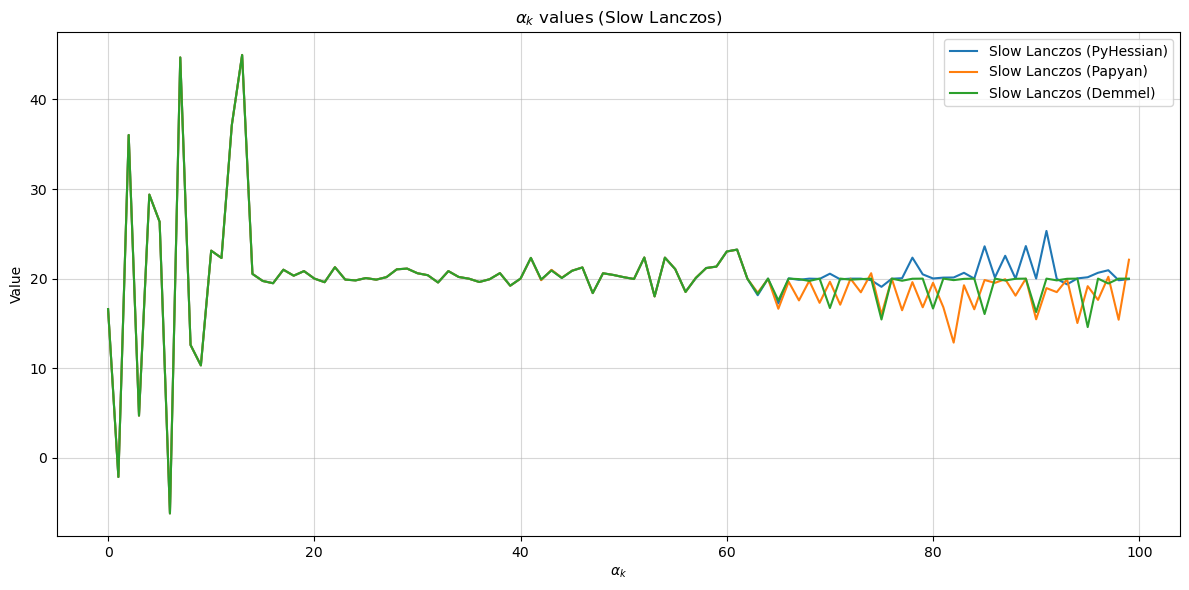

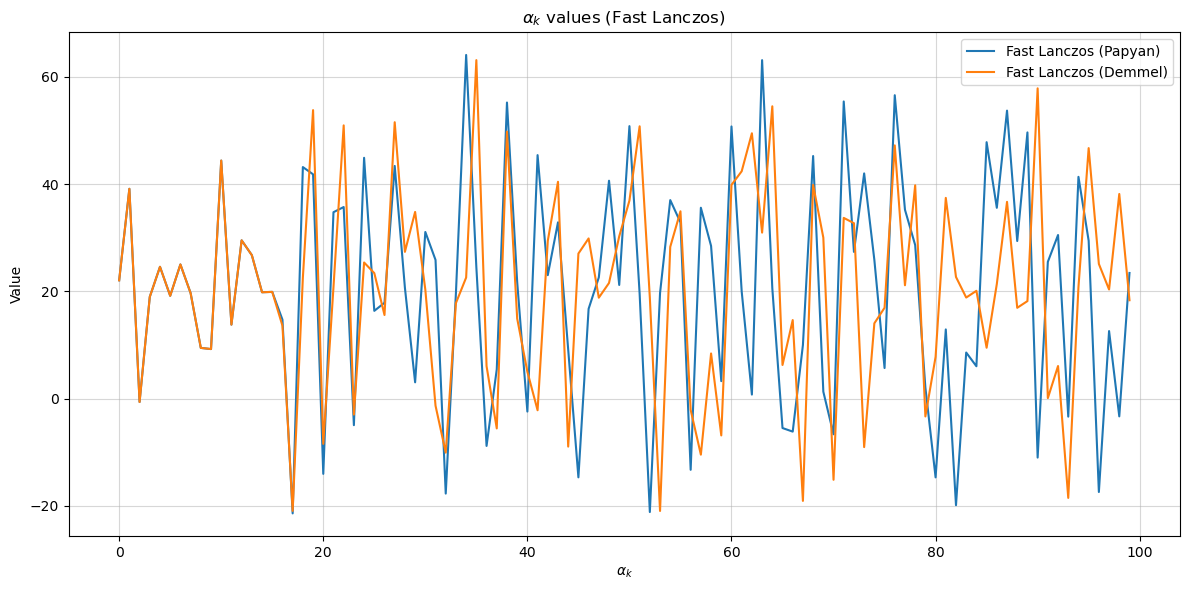

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(alpha_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(alpha_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Slow Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alpha_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(alpha_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Fast Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

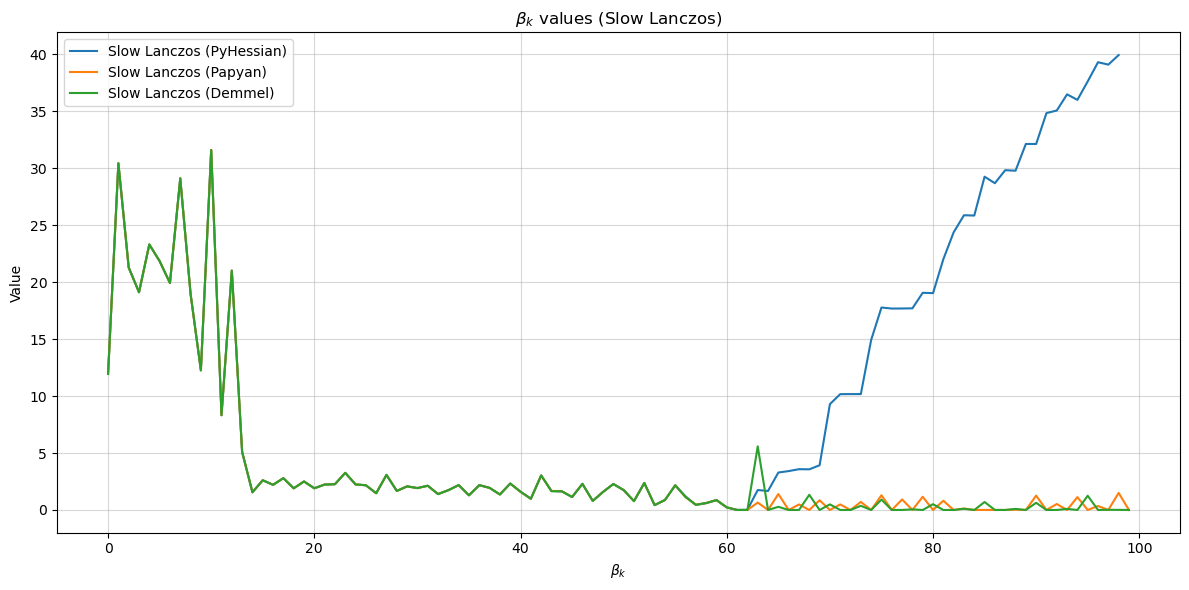

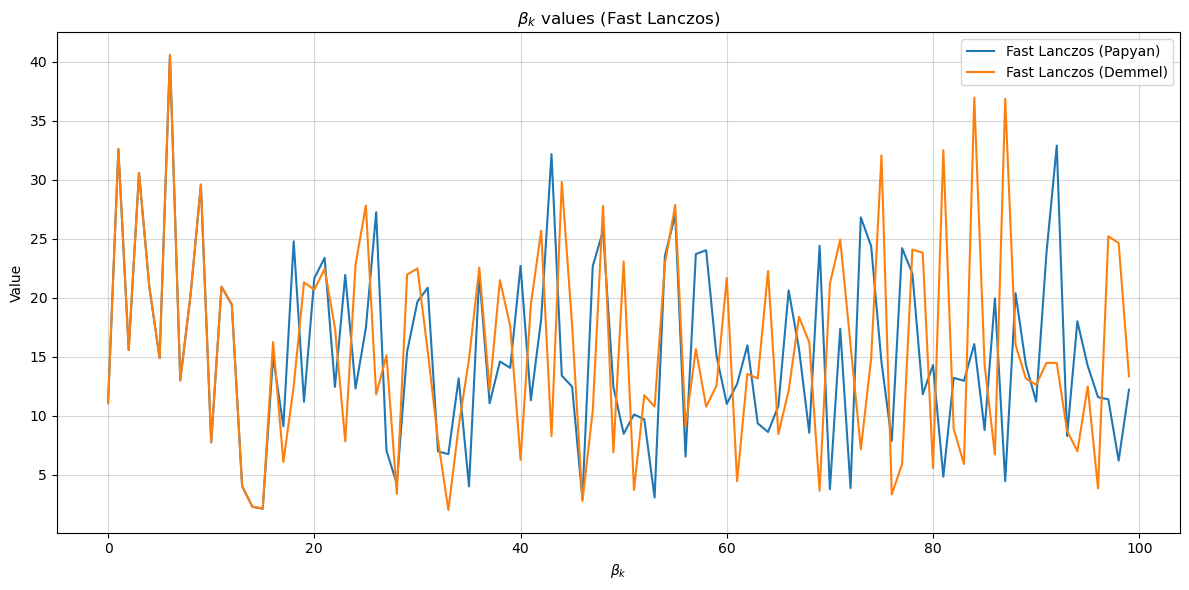

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(beta_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(beta_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(beta_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Slow Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(beta_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(beta_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Fast Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()